In [105]:
# Importando las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline



# Cargando el dataset desde el archivo CSV
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

df.head()

,location,indicator,subject,measure,frequency,time,value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,-
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.81
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.28
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.24
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.54


In [106]:
print(df)
print(df.info)
print(df.describe)
print(df.columns)

      location    indicator subject     measure frequency  time    value 
0          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1990      -   
1          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1991    27.81 
2          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1992    26.28 
3          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1993    26.24 
4          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1994    25.54 
...        ...          ...     ...         ...       ...   ...       ...
12135     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2024   732.15 
12136     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2025   737.01 
12137     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2026   741.10 
12138     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2027   743.49 
12139     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2028   747.01 

[12140 rows x 7 columns]
<bound method DataFrame.info of       location    indicator subject     measure freque

HAY VALORES QUE SON NaN QUE NO HEMOS PODIDO CONVERTIR A NÚMERO POR LO QUE PROCEDEMOS A LA ALIMINACIÓN DE LA FILAS QUE TIENEN ESTOS CALORES NULOS

In [107]:
# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'value' a numérico, forzando errores a NaN para su fácil identificación
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Verificar si hay valores NaN después de la conversión y contarlos
nan_count = df['value'].isna().sum()
print(f"Valores NaN en 'value': {nan_count}")

# Manejar los valores NaN eliminándolos
df_cleaned = df.dropna(subset=['value'])

# Verificar nuevamente el dataset
print(df_cleaned.info())


Valores NaN en 'value': 2365
<class 'pandas.core.frame.DataFrame'>
Index: 9775 entries, 1 to 12139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   9775 non-null   object 
 1   indicator  9775 non-null   object 
 2   subject    9775 non-null   object 
 3   measure    9775 non-null   object 
 4   frequency  9775 non-null   object 
 5   time       9775 non-null   int64  
 6   value      9775 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 610.9+ KB
None


Análisis exploratorio de datos

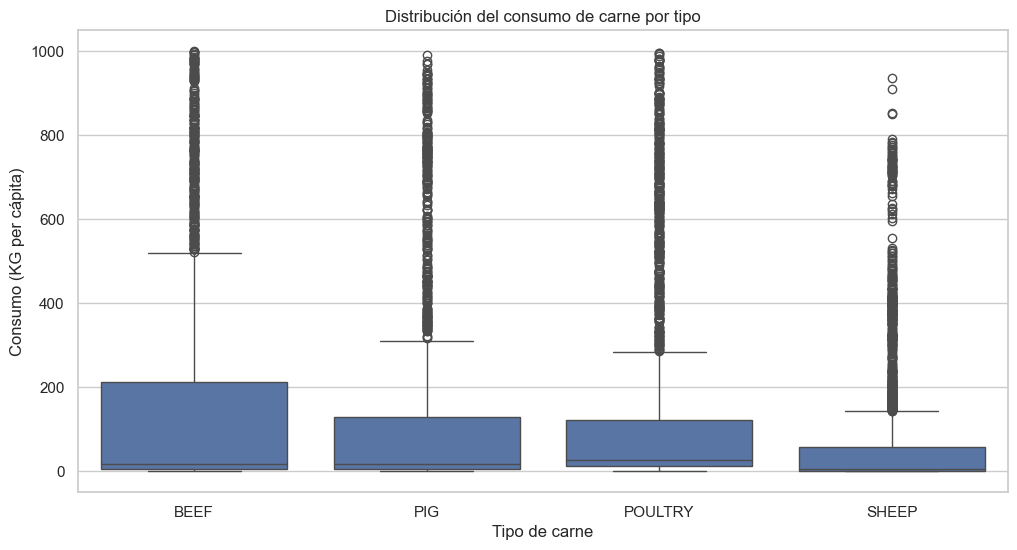

In [108]:
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Distribución de consumo de carne por tipo
plt.figure(figsize=(12, 6))
sns.boxplot(x='subject', y='value', data=df_cleaned)
plt.title('Distribución del consumo de carne por tipo')
plt.xlabel('Tipo de carne')
plt.ylabel('Consumo (KG per cápita)')
plt.show()


EXPLICACIÓN: 

Distribución del Consumo de Carne por Tipo

Ejes
Eje X: Tipo de carne (BEEF, PIG, POULTRY, SHEEP)
Eje Y: Consumo de carne per cápita (KG per cápita)

Descripción
Este gráfico de caja y bigotes muestra la distribución del consumo de diferentes tipos de carne (bovino, porcino, avícola y ovino) en kilogramos per cápita. Cada caja representa la distribución del consumo de un tipo de carne específico.

Componentes del Gráfico

Cajas (Boxplots):
Las cajas representan el rango intercuartílico (IQR), que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Esto significa que el 50% central de los datos se encuentra dentro de la caja.
La línea dentro de cada caja muestra la mediana del consumo de carne, que es el valor central de la distribución.
Bigotes (Whiskers):

Los bigotes se extienden desde los cuartiles hasta los valores máximos y mínimos dentro de 1.5 veces el IQR desde los cuartiles. Estos indican la variabilidad del consumo de carne fuera del 50% central, pero dentro de un rango razonable.


Puntos (Outliers):
Los puntos fuera de los bigotes se consideran valores atípicos (outliers). Estos representan datos que están más allá de 1.5 veces el IQR desde los cuartiles y pueden indicar un consumo de carne excepcionalmente alto o bajo en ciertos casos.
Observaciones


Consumo de Carne de Res (BEEF):
La mediana del consumo de carne de res es relativamente alta comparada con otros tipos de carne.
Existe una gran cantidad de valores atípicos por encima de la caja, lo que indica que hay casos donde el consumo de carne de res es mucho más alto que el rango intercuartílico.


Consumo de Carne de Cerdo (PIG):
La mediana del consumo de carne de cerdo es similar a la de la carne de res.
También se observan muchos valores atípicos, lo que sugiere una variabilidad significativa en el consumo de carne de cerdo.


Consumo de Carne de Ave (POULTRY):
La mediana del consumo de carne de ave es ligeramente menor que la de carne de res y cerdo.
Hay una cantidad considerable de valores atípicos, indicando que en algunos casos el consumo de carne de ave es extremadamente alto.

Consumo de Carne de Oveja (SHEEP):
La mediana del consumo de carne de oveja es la más baja entre los tipos de carne analizados.
Aunque hay menos valores atípicos en comparación con otros tipos de carne, todavía se observa una variabilidad considerable.


Interpretación
El gráfico muestra que, en general, el consumo de carne presenta una gran variabilidad con muchos valores atípicos, especialmente en el caso de la carne de res y cerdo. La mediana del consumo de carne de oveja es la más baja, lo que sugiere que, en promedio, se consume menos carne de oveja comparado con otros tipos de carne.

Este tipo de gráfico es útil para identificar patrones generales en el consumo de carne, así como para detectar valores extremos que podrían requerir una investigación adicional para entender las razones detrás de tales consumos inusuales.

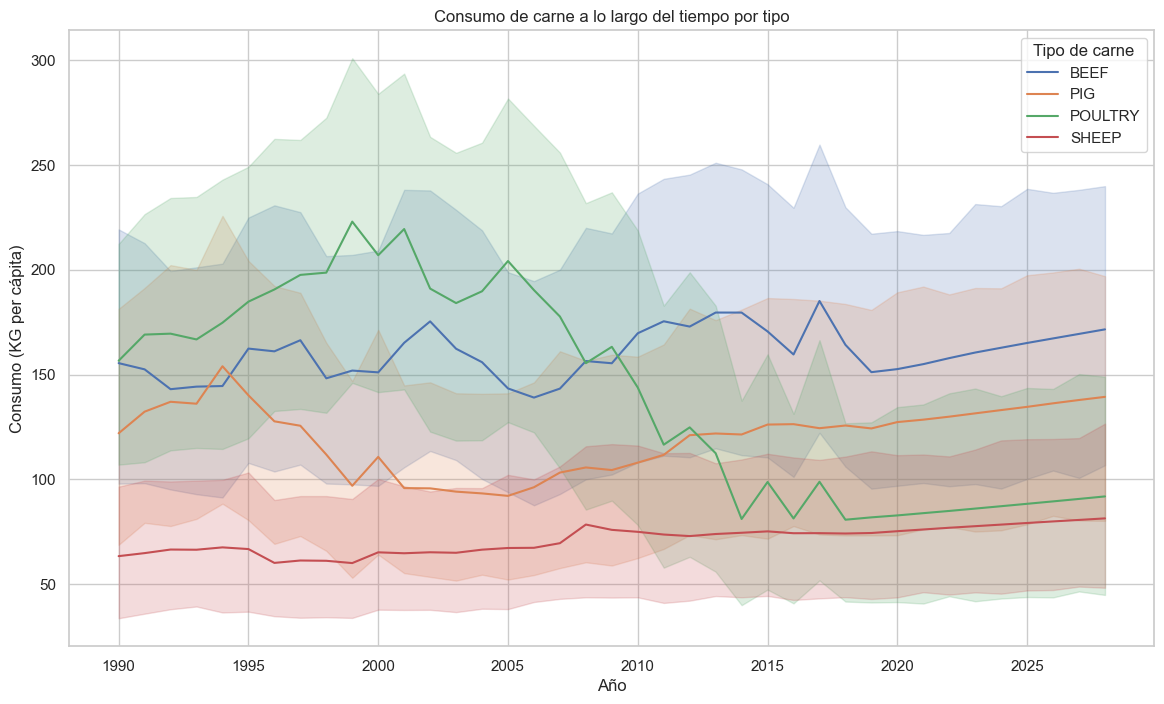

In [109]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='time', y='value', hue='subject', data=df_cleaned)
plt.title('Consumo de carne a lo largo del tiempo por tipo')
plt.xlabel('Año')
plt.ylabel('Consumo (KG per cápita)')
plt.legend(title='Tipo de carne')
plt.show()


EXPLICACIÓN: 

Consumo de carne a lo largo del tiempo por tipo

Ejes
Eje X: Año (1990 - 2028)
Eje Y: Consumo de carne per cápita (KG per cápita)

Descripción
Este gráfico de área muestra cómo ha cambiado el consumo de diferentes tipos de carne (bovino, porcino, avícola y ovino) a lo largo del tiempo, desde 1990 hasta las proyecciones para 2028. Cada área representa el consumo de un tipo específico de carne, y las líneas dentro de las áreas muestran las tendencias anuales de consumo.

Componentes del Gráfico

Áreas Sombreadas:
Las áreas sombreadas representan la variabilidad del consumo de carne para cada tipo. El ancho del área muestra la variabilidad y la consistencia del consumo a lo largo del tiempo.

Líneas de Tendencia:
Las líneas dentro de cada área muestran la tendencia central del consumo de carne para cada tipo a lo largo de los años. Estas líneas ayudan a identificar aumentos o disminuciones en el consumo a lo largo del tiempo.

Colores
BEEF (Carne de Res): Azul
PIG (Carne de Cerdo): Naranja
POULTRY (Carne de Ave): Verde
SHEEP (Carne de Oveja): Rojo

Observaciones

Carne de Res (BEEF):
El consumo de carne de res ha mantenido una tendencia relativamente estable, con ligeras fluctuaciones a lo largo de los años. A partir de 2020, parece haber una ligera tendencia al alza.

Carne de Cerdo (PIG):
El consumo de carne de cerdo muestra una tendencia estable con pequeñas fluctuaciones. Desde mediados de la década de 1990 hasta 2005, hubo un ligero aumento, seguido de una estabilización en el consumo.

Carne de Ave (POULTRY):
El consumo de carne de ave ha experimentado fluctuaciones significativas. Se observa un aumento en el consumo desde principios de la década de 1990 hasta alrededor de 2005, seguido por una disminución y estabilización en años posteriores.

Carne de Oveja (SHEEP):
El consumo de carne de oveja es el más bajo entre los tipos de carne analizados. Ha mantenido una tendencia relativamente estable con ligeras fluctuaciones a lo largo del tiempo.


Interpretación
Este gráfico proporciona una visión clara de cómo ha evolucionado el consumo de diferentes tipos de carne en varios países a lo largo del tiempo. Podemos observar que el consumo de carne de res y cerdo es generalmente más alto y más estable comparado con la carne de ave y oveja.


Estabilidad: La carne de res y cerdo muestran una estabilidad relativa en su consumo, lo que sugiere una preferencia constante por estos tipos de carne a lo largo de los años.

Variabilidad: La carne de ave muestra más variabilidad en su consumo, lo que podría indicar cambios en las preferencias o disponibilidad de esta carne.

Bajo Consumo: La carne de oveja tiene el menor consumo per cápita, lo que podría deberse a factores culturales, económicos o de disponibilidad.

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\1929010285.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value', y='location', data=consumo_por_pais_sorted, palette='tab20')


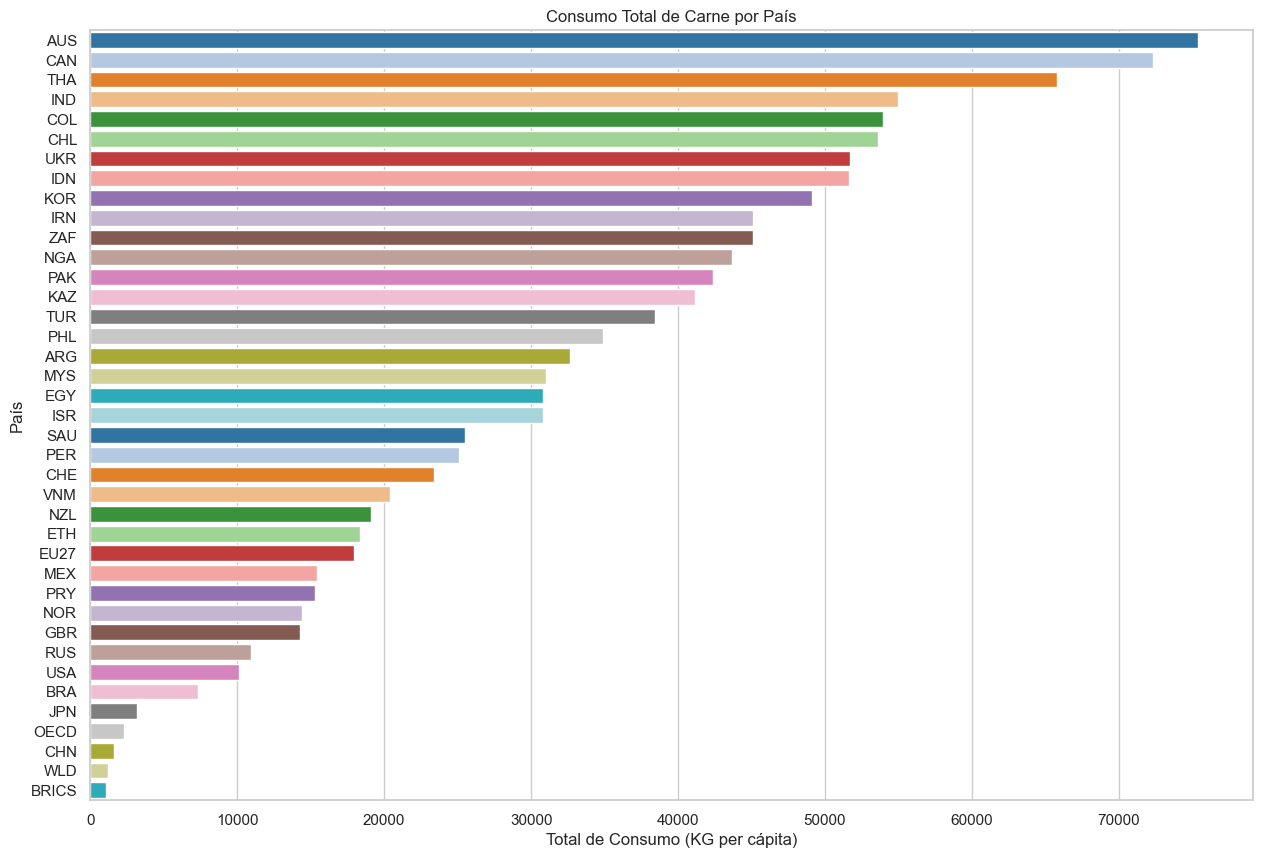

In [110]:
# Agrupar y sumar el consumo por ubicación (país)
consumo_por_pais = df_cleaned.groupby('location')['value'].sum().reset_index()

# Ordenar los países por consumo para una mejor visualización
consumo_por_pais_sorted = consumo_por_pais.sort_values('value', ascending=False)


# Visualización
plt.figure(figsize=(15, 10))
sns.barplot(x='value', y='location', data=consumo_por_pais_sorted, palette='tab20')

plt.title('Consumo Total de Carne por País')
plt.xlabel('Total de Consumo (KG per cápita)')
plt.ylabel('País')
plt.show()


EXPLICACIÓN: 

Consumo Total de Carne por País

Ejes
Eje X: Total de Consumo (KG per cápita)
Eje Y: País
Descripción
Este gráfico de barras muestra el consumo total de carne por país en kilogramos per cápita. Los países están ordenados de mayor a menor consumo total de carne, permitiendo una comparación clara y directa entre ellos.

Componentes del Gráfico
Barras Horizontales:

Cada barra representa el consumo total de carne en un país específico.
La longitud de la barra es proporcional al consumo total de carne, medido en kilogramos per cápita.
Colores de las Barras:

Las barras están coloreadas para diferenciar visualmente entre los países.

Observaciones


Australia (AUS):
Australia lidera el gráfico con el consumo total de carne más alto, superando los 70,000 KG per cápita. Esto indica un consumo de carne extremadamente alto en comparación con otros países.


Canadá (CAN):
Canadá sigue a Australia, con un consumo total cercano a los 70,000 KG per cápita, lo que también refleja un alto consumo de carne.


Tailandia (THA):
Tailandia está en el tercer lugar, con un consumo total de carne superior a 60,000 KG per cápita, indicando una tendencia fuerte de consumo de carne.


India (IND) y Colombia (COL):
India y Colombia tienen consumos totales de carne superiores a 50,000 KG per cápita, situándolos entre los países con altos niveles de consumo de carne.


Otros Países:
Países como Chile (CHL), Ucrania (UKR), Indonesia (IDN) y Corea del Sur (KOR) también muestran consumos significativos de carne, con valores que oscilan entre los 40,000 y 50,000 KG per cápita.
En el extremo inferior del gráfico, países como Brasil (BRA), Japón (JPN), China (CHN), y regiones como WLD (mundo) y BRICS tienen consumos totales de carne más bajos en comparación con los líderes.

Interpretación
Este gráfico permite una comparación clara y directa del consumo total de carne entre diferentes países. Al observar las barras, se puede identificar rápidamente qué países tienen los mayores y menores consumos de carne per cápita.

Altos Consumos: Países como Australia y Canadá destacan por sus altos consumos totales de carne, lo que podría estar relacionado con factores culturales, económicos y de disponibilidad.

Variabilidad: Hay una variabilidad significativa en el consumo de carne entre los países, con algunos mostrando consumos mucho más altos que otros.

Tendencias Regionales: El gráfico también sugiere posibles tendencias regionales en el consumo de carne, aunque esto requeriría un análisis más detallado para confirmarse.

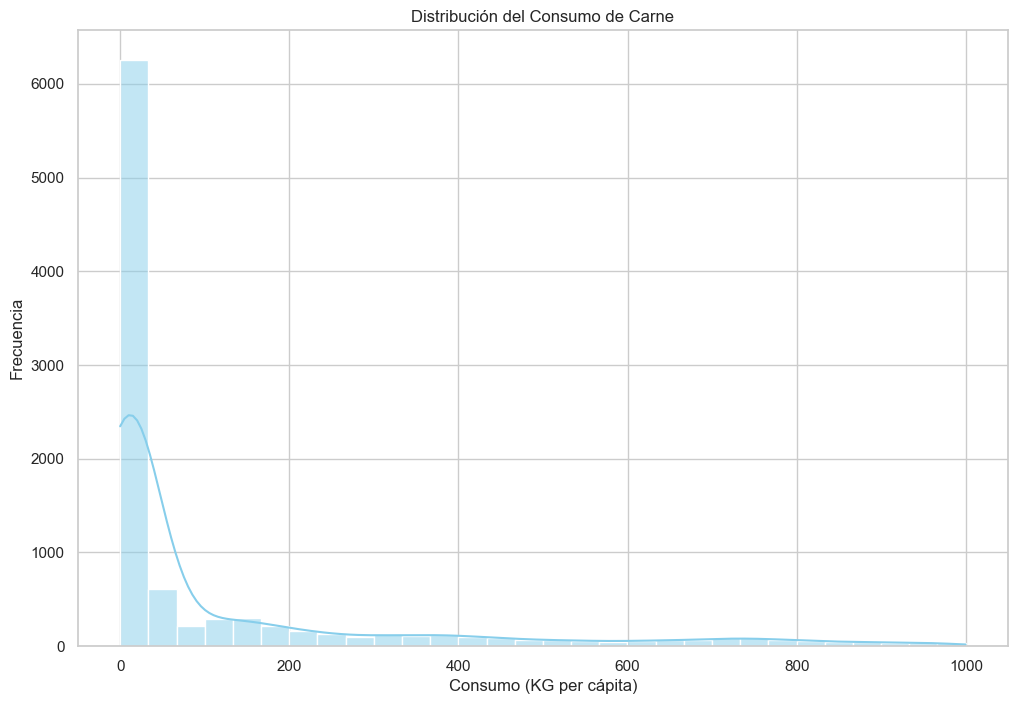

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para visualizar la distribución del consumo de carne
plt.figure(figsize=(12, 8))
sns.histplot(df_cleaned['value'], kde=True, bins=30, color='skyblue')

plt.title('Distribución del Consumo de Carne')
plt.xlabel('Consumo (KG per cápita)')
plt.ylabel('Frecuencia')
plt.show()


EXPLICACIÓN: Distribución del Consumo de Carne

Ejes
Eje X: Consumo (KG per cápita)
Eje Y: Frecuencia


Descripción
Este histograma muestra la distribución del consumo de carne en kilogramos per cápita en los datos disponibles. La altura de cada barra representa el número de países (frecuencia) cuyo consumo de carne per cápita cae dentro del rango especificado por la barra.


Componentes del Gráfico

Barras del Histograma:
Las barras representan la frecuencia del consumo de carne en diferentes rangos de valores. Cada barra cubre un intervalo específico del consumo en kilogramos per cápita.

Línea de Densidad:
La línea suave sobre las barras representa la densidad de probabilidad del consumo de carne, proporcionando una estimación continua de la distribución subyacente.


Observaciones

Concentración en Valores Bajos:
La mayoría de los valores de consumo de carne per cápita están concentrados en el rango más bajo (cerca de 0). Esta barra alta indica que muchos países tienen un consumo de carne muy bajo.

Disminución Rápida:
Después del pico inicial, la frecuencia disminuye rápidamente. Esto sugiere que a medida que aumenta el consumo de carne per cápita, hay menos países con valores más altos de consumo.

Valores Atípicos:
Hay algunos valores de consumo muy altos (alrededor de 1000 KG per cápita), pero son relativamente raros. Estos puntos están representados por las barras más pequeñas hacia la derecha del gráfico.


Interpretación
Este histograma indica que la mayoría de los países tienen un consumo de carne per cápita bajo, con pocos países que muestran consumos significativamente altos. La distribución es asimétrica con una larga cola hacia la derecha, lo que sugiere la presencia de valores atípicos elevados.


Distribución Sesgada a la Derecha: La mayor concentración de datos en la parte inferior izquierda y una larga cola hacia la derecha indican una distribución sesgada, típica en datos de consumo donde pocos valores extremos elevan la media.

Frecuencia Alta en Bajos Consumos: La barra más alta en el extremo izquierdo sugiere que muchos países tienen un consumo de carne per cápita cercano a cero, lo cual puede ser debido a varios factores, como hábitos alimenticios, disponibilidad de carne, o políticas económicas.

Valores Atípicos: Los países con consumos de carne per cápita extremadamente altos son atípicos y podrían ser objeto de estudios más detallados para entender las razones detrás de estos altos consumos.

EMPEZAMOS CON EL ANALISIS DESCRIPTIVO

ANÁLISIS POR TIPO DE CARNE

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el dataset desde el archivo CSV
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'value' a numérico, forzando errores a NaN para su fácil identificación
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Manejar los valores NaN eliminándolos
df_cleaned = df.dropna(subset=['value'])

# Análisis estadístico descriptivo por tipo de carne
descriptive_stats = df_cleaned.groupby('subject')['value'].describe()

# Mostrar las estadísticas descriptivas
print(descriptive_stats)


          count        mean         std   min      25%     50%       75%  \
subject                                                                    
BEEF     2410.0  160.249133  250.331688  0.35   6.4825  17.725  212.0425   
PIG      2339.0  119.833514  217.270159  0.00   5.2050  16.830  129.6900   
POULTRY  2201.0  147.195111  249.281109  0.11  11.7600  27.110  121.2300   
SHEEP    2825.0   71.095696  145.155083  0.01   1.0900   5.090   58.2000   

            max  
subject          
BEEF     999.69  
PIG      990.67  
POULTRY  996.22  
SHEEP    937.13  


EXPLICACIÓN: 

HACEMOS ANALISIS DE CORRELACIÓN DE LAS VARIABLES

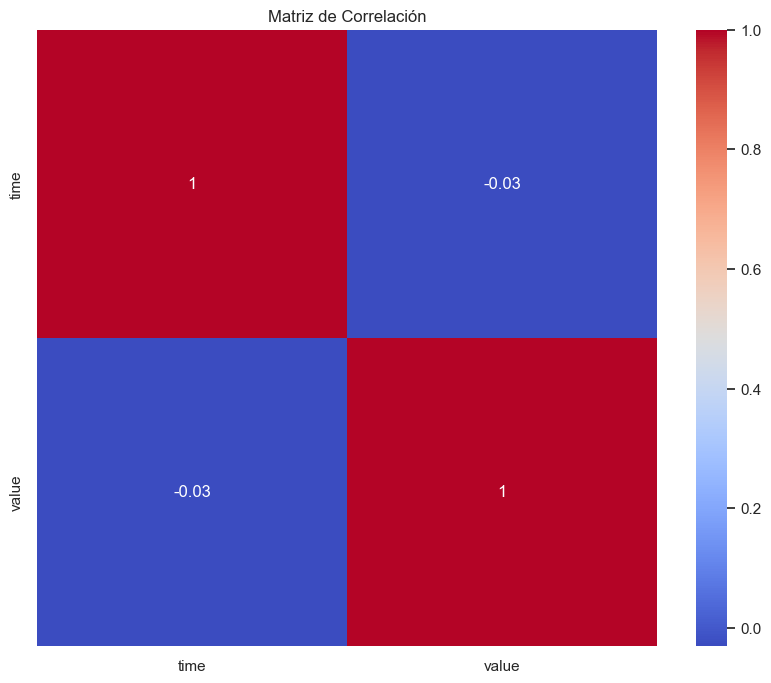

In [114]:
# Seleccionar solo las columnas numéricas
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


EXPLICACIÓN: 

Explicación de la Matriz de Correlación

Correlación: La correlación mide la fuerza y la dirección de una relación lineal entre dos variables. Los valores de correlación están entre -1 y 1.

o   1 indica una correlación positiva perfecta.

o  -1 indica una correlación negativa perfecta.

o   0 indica que no hay correlación lineal entre las variables.


Interpretación de la MatrizDiagonal Principal:
La correlación de una variable consigo misma siempre es 1, lo cual es representado por la diagonal principal (de color rojo intenso).
Por ejemplo, time con time y value con value son iguales a 1.

Off-Diagonal:
La correlación entre time y value es -0.03, lo que indica que hay una correlación negativa muy débil entre el tiempo y el consumo de carne. En otras palabras, no hay una relación lineal fuerte entre el año y el consumo de carne reportado en tu dataset.
La correlación entre value y time también es -0.03 por la simetría de la matriz de correlación.

ANALISIS PREDICTIVO

REGRESIÓN LINEAL GENERAL

General Mean Squared Error: 50804.551453913766
General R^2 Score: 0.0003159684871318902


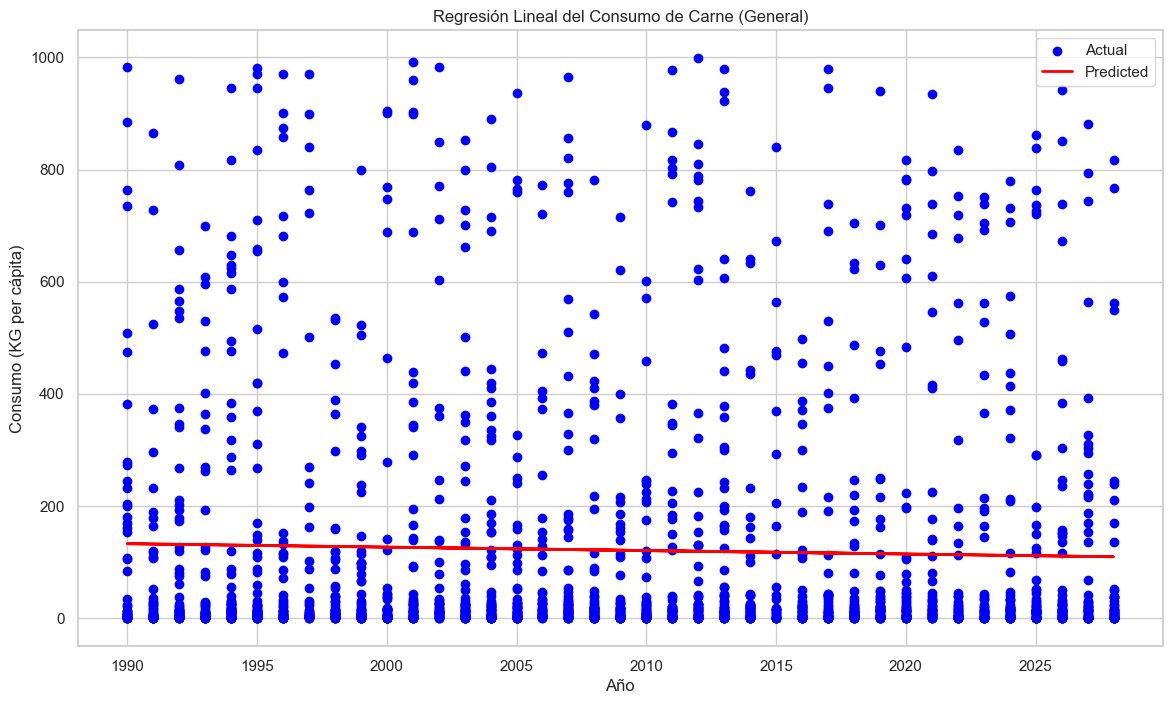

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos para la regresión lineal general
X_general = df_cleaned[['time']]
y_general = df_cleaned['value']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_general, y_general, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model_gen = LinearRegression()

# Entrenar el modelo
model_gen.fit(X_train_gen, y_train_gen)

# Hacer predicciones
y_pred_gen = model_gen.predict(X_test_gen)

# Evaluar el modelo
mse_gen = mean_squared_error(y_test_gen, y_pred_gen)
r2_gen = r2_score(y_test_gen, y_pred_gen)
print(f"General Mean Squared Error: {mse_gen}")
print(f"General R^2 Score: {r2_gen}")

# Visualización de resultados
plt.figure(figsize=(14, 8))
plt.scatter(X_test_gen, y_test_gen, color='blue', label='Actual')
plt.plot(X_test_gen, y_pred_gen, color='red', linewidth=2, label='Predicted')
plt.title('Regresión Lineal del Consumo de Carne (General)')
plt.xlabel('Año')
plt.ylabel('Consumo (KG per cápita)')
plt.legend()
plt.show()



Explicación:

Regresión Lineal del Consumo de Carne (General)

Ejes

Eje X: Año (1990 - 2028)
Eje Y: Consumo de carne per cápita (KG per cápita)

Descripción

Este gráfico de dispersión muestra los datos reales de consumo de carne (puntos azules) y la línea de regresión lineal ajustada (línea roja) que intenta predecir el consumo de carne a lo largo del tiempo. La línea de regresión se ajusta a los datos para encontrar una relación lineal entre el año y el consumo de carne per cápita.

Componentes del Gráfico

Puntos de Datos Reales:

Cada punto azul representa un valor observado de consumo de carne en un año específico.

Línea de Regresión:

La línea roja muestra la predicción del consumo de carne basada en la regresión lineal. Idealmente, esta línea debería reflejar una tendencia general en los datos si existe una relación lineal significativa entre el tiempo y el consumo.
Métricas del Modelo

Mean Squared Error (MSE):

General Mean Squared Error: 50804.551453913766
El MSE es una medida de la calidad del modelo, calculando el promedio de los cuadrados de los errores o diferencias entre los valores observados y los valores predichos. Un valor alto de MSE indica que el modelo tiene grandes errores de predicción.

Coeficiente de Determinación (R²):

General R² Score: 0.0003159684871318902
El R² mide la proporción de la variabilidad en los datos de respuesta que puede ser explicada por el modelo. Un valor de R² cercano a 0 indica que el modelo no explica bien la variabilidad de los datos.


Observaciones


Dispersión de los Datos:

Los datos observados (puntos azules) están muy dispersos y no parecen seguir una tendencia lineal clara a lo largo del tiempo.
Hay muchos puntos con consumos muy altos y muy bajos, lo que sugiere una alta variabilidad en los datos.

Línea de Regresión:

La línea de regresión (roja) es casi horizontal, lo que indica que el modelo lineal no detecta una tendencia significativa en el consumo de carne a lo largo del tiempo.
La línea de regresión no se ajusta bien a los datos debido a la alta variabilidad y la falta de una relación lineal clara.
Interpretación de las Métricas

Mean Squared Error (MSE):

El valor del MSE (50804.551453913766) es bastante alto, lo que indica que hay grandes discrepancias entre los valores observados y los valores predichos por el modelo de regresión lineal.
Este alto valor sugiere que el modelo no está prediciendo con precisión el consumo de carne.

Coeficiente de Determinación (R²):

El valor de R² (0.0003159684871318902) es muy cercano a 0, lo que significa que la regresión lineal explica prácticamente nada de la variabilidad en el consumo de carne per cápita.
Un R² tan bajo indica que no hay una relación lineal significativa entre el año y el consumo de carne, y que otros factores pueden estar influyendo en el consumo de carne más que el tiempo.

REGRESIÓN LINEAL POR TIPO DE CARNE

BEEF Mean Squared Error: 58400.51254311008
BEEF R^2 Score: -0.00446232165008853
PIG Mean Squared Error: 47586.98563682588
PIG R^2 Score: -0.0008557165772102859
POULTRY Mean Squared Error: 59999.93484205576
POULTRY R^2 Score: 0.04180063477442386
SHEEP Mean Squared Error: 20103.59767452699
SHEEP R^2 Score: 0.00033881132594215657


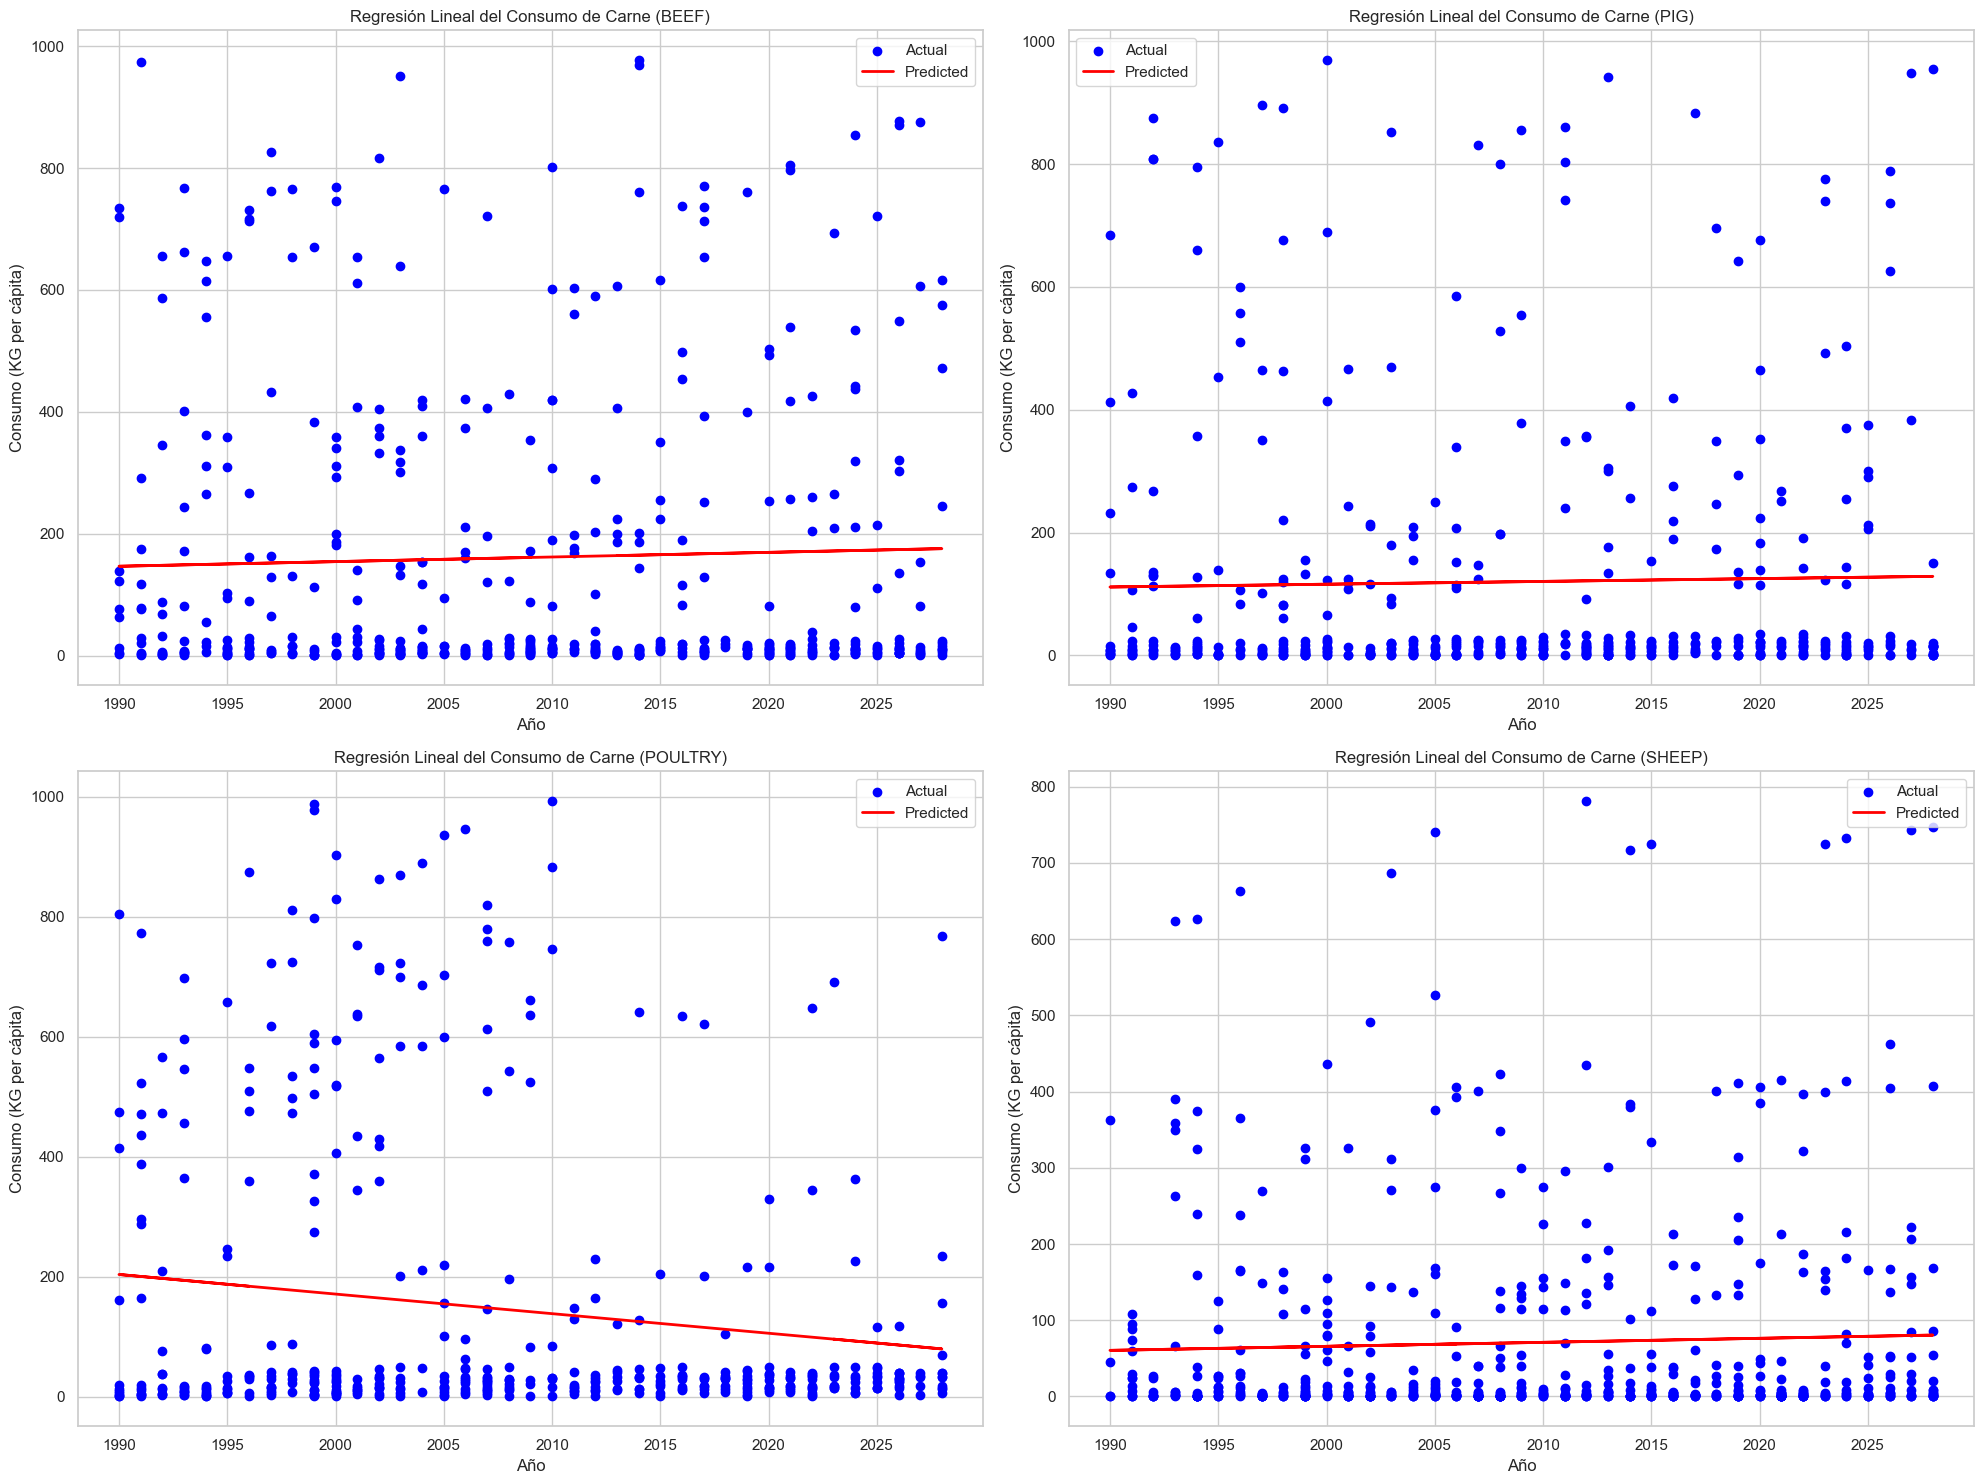

In [116]:
# Tipos de carne
meat_types = df_cleaned['subject'].unique()

# Crear una figura para los gráficos
plt.figure(figsize=(20, 15))

# Iterar sobre cada tipo de carne y ajustar un modelo de regresión lineal
for i, meat in enumerate(meat_types):
    plt.subplot(2, 2, i+1)  # Crear un subplot para cada tipo de carne
    
    # Filtrar los datos por tipo de carne
    df_meat = df_cleaned[df_cleaned['subject'] == meat]
    X_meat = df_meat[['time']]
    y_meat = df_meat['value']
    
    # Dividir el dataset en conjuntos de entrenamiento y prueba
    X_train_meat, X_test_meat, y_train_meat, y_test_meat = train_test_split(X_meat, y_meat, test_size=0.2, random_state=42)
    
    # Crear el modelo de regresión lineal
    model_meat = LinearRegression()
    
    # Entrenar el modelo
    model_meat.fit(X_train_meat, y_train_meat)
    
    # Hacer predicciones
    y_pred_meat = model_meat.predict(X_test_meat)
    
    # Evaluar el modelo
    mse_meat = mean_squared_error(y_test_meat, y_pred_meat)
    r2_meat = r2_score(y_test_meat, y_pred_meat)
    print(f"{meat} Mean Squared Error: {mse_meat}")
    print(f"{meat} R^2 Score: {r2_meat}")
    
    # Visualización de resultados
    plt.scatter(X_test_meat, y_test_meat, color='blue', label='Actual')
    plt.plot(X_test_meat, y_pred_meat, color='red', linewidth=2, label='Predicted')
    plt.title(f'Regresión Lineal del Consumo de Carne ({meat})')
    plt.xlabel('Año')
    plt.ylabel('Consumo (KG per cápita)')
    plt.legend()

plt.tight_layout()
plt.show()


EXPLICACIÓN:

Regresión Lineal del Consumo de Carne (por tipo)

Ejes
Eje X: Año (1990 - 2028)
Eje Y: Consumo de carne per cápita (KG per cápita)


Descripción

Cada uno de los cuatro gráficos de dispersión muestra los datos reales de consumo de carne (puntos azules) y la línea de regresión lineal ajustada (línea roja) para los tipos de carne: bovino (BEEF), porcino (PIG), avícola (POULTRY) y ovino (SHEEP). Estos gráficos intentan predecir el consumo de carne a lo largo del tiempo para cada tipo específico.


Métricas del Modelo y Observaciones por Tipo de Carne


1. Carne de Res (BEEF)
Mean Squared Error (MSE): 58400.51254311008
R² Score: -0.00446232165008853

Observaciones:

Los puntos de datos observados están muy dispersos y no siguen una tendencia lineal clara.
La línea de regresión es casi horizontal, indicando que el modelo no detecta una tendencia significativa en el consumo de carne de res a lo largo del tiempo.
El R² negativo indica que el modelo de regresión lineal no es adecuado y que predecir usando la media sería mejor.



2. Carne de Cerdo (PIG)
Mean Squared Error (MSE): 47586.98563682588
R² Score: -0.0008557165772102859

Observaciones:

Al igual que con la carne de res, los datos están muy dispersos.
La línea de regresión es prácticamente horizontal, lo que sugiere que no hay una relación lineal clara.
El R² cercano a cero y negativo indica que el modelo no explica la variabilidad en el consumo de carne de cerdo.



3. Carne de Ave (POULTRY)
Mean Squared Error (MSE): 59999.93484205576
R² Score: 0.04180063477442386

Observaciones:

Los datos de consumo de carne de ave muestran una ligera tendencia decreciente a lo largo del tiempo, indicada por la inclinación negativa de la línea de regresión.
Aunque el R² es positivo, sigue siendo muy bajo, indicando que el modelo lineal no explica bien la variabilidad en el consumo de carne de ave.



4. Carne de Oveja (SHEEP)
Mean Squared Error (MSE): 20103.59767452699
R² Score: 0.00033881132594215657

Observaciones:

Los datos de consumo de carne de oveja también están dispersos, sin una tendencia lineal clara.
La línea de regresión es casi horizontal, indicando que no hay una tendencia significativa en el tiempo.
El R² cercano a cero sugiere que el modelo lineal apenas explica la variabilidad en el consumo de carne de oveja.



Interpretación General

Dispersión de los Datos:

Los datos observados para todos los tipos de carne están muy dispersos y no siguen una tendencia lineal clara. Esto indica una alta variabilidad en los datos de consumo de carne.


Líneas de Regresión:

Las líneas de regresión para todos los tipos de carne son casi horizontales, lo que sugiere que no hay una relación significativa entre el tiempo y el consumo de carne.


Métricas del Modelo:

Los valores altos de MSE para todos los tipos de carne indican grandes errores de predicción.
Los valores de R² cercanos a cero o negativos indican que la regresión lineal no es un modelo adecuado para predecir el consumo de carne a lo largo del tiempo.



Conclusión
Los gráficos y las métricas de rendimiento del modelo de regresión lineal por tipo de carne sugieren que la regresión lineal no es adecuada para predecir el consumo de carne per cápita. La alta dispersión de los datos y la falta de una tendencia lineal significativa indican que se deben considerar otros factores o modelos más complejos para entender y predecir el consumo de carne.


PCA

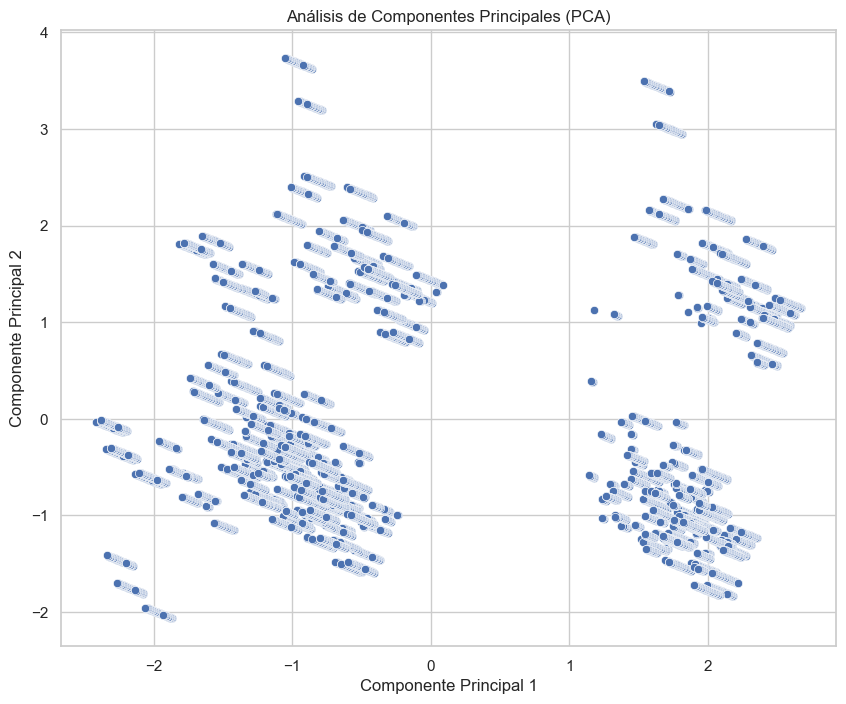

In [117]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline

# Cargar el dataset desde el archivo CSV
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'value' a numérico, forzando errores a NaN para su fácil identificación
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Manejar los valores NaN eliminándolos
df_cleaned = df.dropna(subset=['value'])

# Separar las características numéricas y categóricas
numeric_cols = ['time']
categorical_cols = ['location', 'indicator', 'subject', 'measure', 'frequency']

# Codificar las variables categóricas usando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_cleaned[categorical_cols])

# Crear un DataFrame con las características codificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Combinar las características codificadas con las características numéricas
df_combined = pd.concat([encoded_df, df_cleaned[numeric_cols]], axis=1)

# Estandarizar los datos
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_combined)

# Convertir a DataFrame para manejar NaNs
df_standardized = pd.DataFrame(df_standardized, columns=df_combined.columns)

# Verificar y eliminar cualquier valor NaN restante
df_standardized = df_standardized.dropna()

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_standardized)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualización de los componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


EXPLICACIÓN:

Análisis de Componentes Principales (PCA)

Ejes
Eje X: Componente Principal 1
Eje Y: Componente Principal 2



Descripción
Este gráfico de dispersión muestra los resultados de un Análisis de Componentes Principales (PCA), una técnica de reducción de dimensionalidad que transforma los datos originales en un nuevo conjunto de variables no correlacionadas llamadas componentes principales. En este gráfico, se representan los dos primeros componentes principales, que capturan la mayor parte de la varianza en los datos originales.

Componentes del Gráfico

Puntos de Datos:
Cada punto azul representa una observación en el espacio transformado de los dos primeros componentes principales.

Agrupaciones (Clusters) Visuales:
La dispersión y agrupación de los puntos pueden sugerir la presencia de patrones o grupos naturales en los datos.


Observaciones


Distribución de los Puntos:
Los puntos parecen formar agrupaciones o clusters en el espacio de los componentes principales. Esto indica que puede haber grupos naturales en los datos que comparten características similares.


Varianza Explicada por los Componentes:
Los componentes principales están ordenados de manera que el primer componente captura la mayor parte de la varianza, seguido por el segundo componente. La distribución de los puntos en estos dos componentes proporciona una visión clara de la estructura subyacente de los datos.


Interpretación de los Componentes:
El Componente Principal 1 (eje X) y el Componente Principal 2 (eje Y) son combinaciones lineales de las variables originales. La separación entre los puntos en estos componentes indica la diferenciación entre las observaciones en el conjunto de datos original.


Interpretación
Identificación de Clusters:

La visualización sugiere la existencia de varios clusters o agrupaciones en los datos. Estos clusters podrían representar diferentes grupos de países o tipos de consumo de carne con características similares.


Reducción de Dimensionalidad:

El PCA ha reducido los datos a dos dimensiones mientras preserva la mayor parte de la varianza. Esto facilita la visualización y el análisis de las estructuras subyacentes en los datos.


Análisis Adicional:

Para entender mejor los clusters y sus características, se podría realizar un análisis adicional, como el clustering k-means o una exploración más profunda de las características de los componentes principales.



Conclusión
El gráfico de PCA proporciona una visión simplificada pero informativa de la estructura del conjunto de datos de consumo de carne. La presencia de agrupaciones sugiere que hay patrones significativos en los datos que pueden ser útiles para segmentar países o tipos de consumo de carne. Esta técnica es especialmente valiosa para la exploración inicial de los datos y para preparar los datos para análisis más complejos, como clustering o modelos predictivos.

CLUSTERING Y K-MEANS

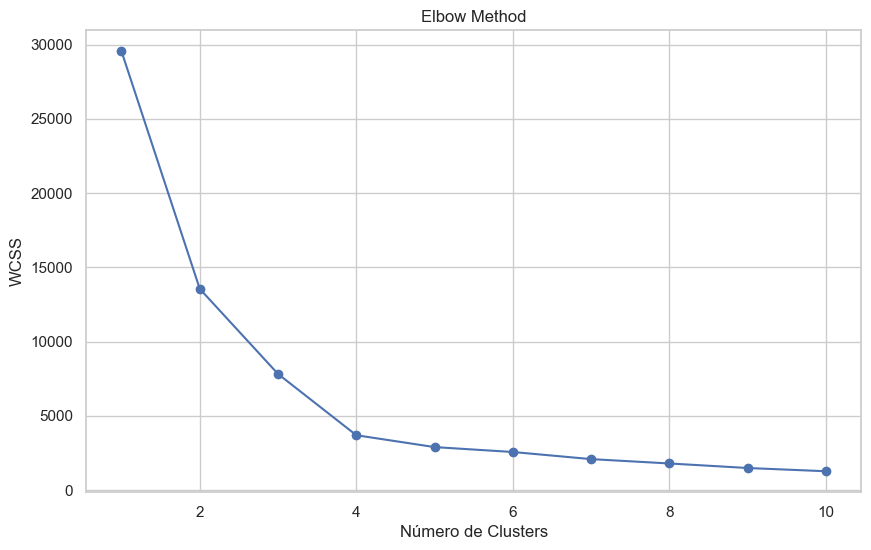

In [119]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular el Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca[['PC1', 'PC2']])
    wcss.append(kmeans.inertia_)

# Visualizar el Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


EXPLICACIÓN:

Elbow Method

Ejes
Eje X: Número de Clusters
Eje Y: WCSS (Within-Cluster Sum of Squares)

Descripción
Este gráfico muestra el resultado del Método del Codo (Elbow Method) aplicado al análisis de clustering. El objetivo del Método del Codo es determinar el número óptimo de clusters (grupos) en un conjunto de datos. El gráfico representa la suma de los cuadrados dentro de los clusters (WCSS) en función del número de clusters.

Componentes del Gráfico

Puntos de Datos:

Cada punto representa el valor de WCSS para un número específico de clusters.
Los puntos están conectados por una línea para visualizar mejor la tendencia.

Curva del Codo:

La curva formada por los puntos de datos muestra cómo cambia WCSS a medida que aumenta el número de clusters.
La "forma de codo" en la curva indica el punto donde añadir más clusters no mejora significativamente la suma de los cuadrados dentro de los clusters (WCSS).




Observaciones

Punto de Inflexión (Elbow Point):

El gráfico muestra un claro punto de inflexión alrededor de 3-4 clusters.
Este punto de inflexión es donde la disminución de WCSS empieza a ser menos pronunciada con el aumento del número de clusters.

Interpretación del Codo:

Antes del punto de inflexión, agregar más clusters reduce significativamente WCSS, lo que significa que los datos se están dividiendo en grupos más homogéneos.
Después del punto de inflexión, agregar más clusters no reduce WCSS de manera significativa, lo que sugiere que los clusters adicionales no mejoran mucho la homogeneidad de los grupos.




Interpretación

Número Óptimo de Clusters:

El punto de inflexión alrededor de 3-4 clusters sugiere que este es el número óptimo de clusters para este conjunto de datos.
Elegir el número óptimo de clusters es crucial para balancear la simplicidad y la precisión del modelo de clustering.

WCSS y Homogeneidad:

Un WCSS más bajo indica que los puntos dentro de cada cluster están más cerca unos de otros, lo que significa que los clusters son más homogéneos.
El Método del Codo ayuda a identificar el número de clusters donde la mejora en la homogeneidad se estabiliza.



Conclusión
El gráfico del Método del Codo sugiere que el número óptimo de clusters para este conjunto de datos es alrededor de 3-4. Esta elección permite capturar la estructura subyacente de los datos sin agregar complejidad innecesaria. El Método del Codo es una herramienta útil en el análisis de clustering, ya que proporciona una visualización clara para decidir el número de clusters a utilizar en el modelo.


In [121]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_pca[['PC1', 'PC2']])
silhouette_avg = silhouette_score(df_pca[['PC1', 'PC2']], labels)
print(f"Silhouette Score para 3 clusters: {silhouette_avg}")


Silhouette Score para 3 clusters: 0.7875429244991137


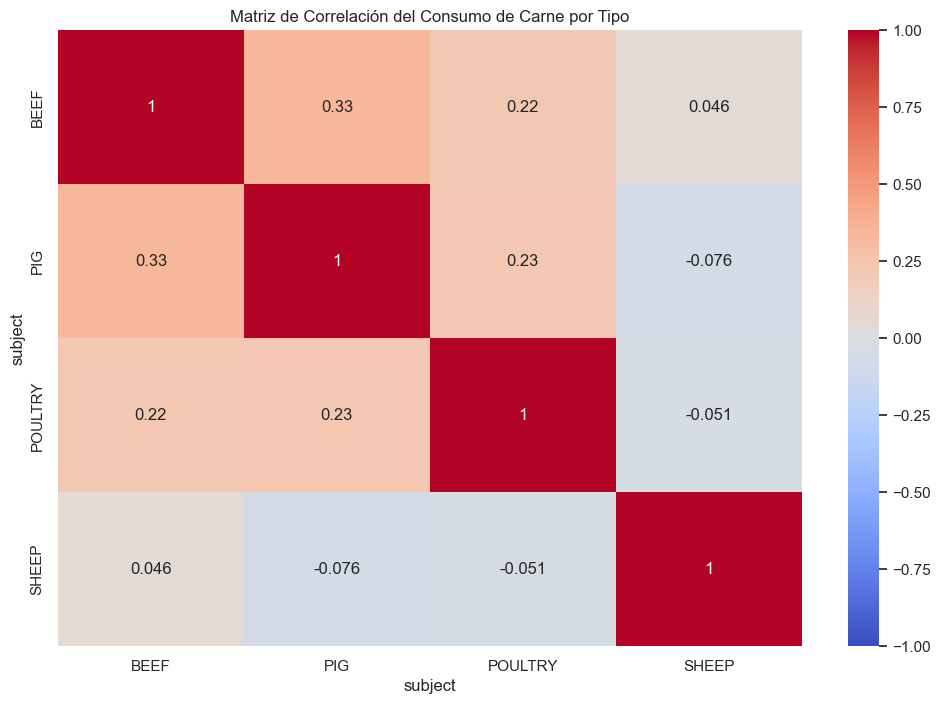

In [122]:
# Crear una tabla pivote con el consumo de carne por tipo y por país/año
pivot_table = df_cleaned.pivot_table(values='value', index=['location', 'time'], columns='subject', aggfunc='mean')

# Calcular la matriz de correlación
correlation_matrix = pivot_table.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación del Consumo de Carne por Tipo')
plt.show()


EXPLICACIÓN:

Matriz de Correlación del Consumo de Carne por Tipo

Ejes

Eje X: Tipo de Carne (BEEF, PIG, POULTRY, SHEEP)

Eje Y: Tipo de Carne (BEEF, PIG, POULTRY, SHEEP)



Descripción
Este gráfico de calor muestra la matriz de correlación entre los consumos de diferentes tipos de carne: bovino (BEEF), porcino (PIG), avícola (POULTRY) y ovino (SHEEP). Cada celda en la matriz representa el coeficiente de correlación de Pearson entre dos tipos de carne, indicando cómo varían juntos.

Componentes del Gráfico

Celdas de Correlación:

Cada celda contiene un valor numérico que representa el coeficiente de correlación entre los tipos de carne correspondientes en los ejes X e Y.
El rango de valores del coeficiente de correlación es de -1 a 1.
o   1 indica una correlación positiva perfecta.
o   -1 indica una correlación negativa perfecta.
o   0 indica ninguna correlación.

Colores de las Celdas:

Los colores de las celdas varían desde el rojo oscuro (correlación positiva fuerte) hasta el azul (correlación negativa fuerte), pasando por el blanco (sin correlación).
La barra de colores a la derecha del gráfico indica la magnitud de la correlación.


Observaciones

Correlaciones Fuertes:

La diagonal principal de la matriz tiene un valor de 1 para todas las celdas, lo que es esperado ya que cada tipo de carne está perfectamente correlacionado consigo mismo.

Correlaciones Positivas:

BEEF y PIG: La correlación entre el consumo de carne de res y carne de cerdo es 0.33, indicando una correlación positiva moderada.

PIG y POULTRY: La correlación entre el consumo de carne de cerdo y carne de ave es 0.23, también indicando una correlación positiva moderada.

BEEF y POULTRY: La correlación entre el consumo de carne de res y carne de ave es 0.22, lo que sugiere una correlación positiva pero más débil.


Correlaciones Negativas o Nulas:

SHEEP y otros tipos de carne: Las correlaciones entre el consumo de carne de oveja y otros tipos de carne (BEEF, PIG, POULTRY) son muy bajas o ligeramente negativas (0.046, -0.076, -0.051 respectivamente), lo que indica que no hay una correlación significativa entre el consumo de carne de oveja y el consumo de los otros tipos de carne.



Interpretación

Relaciones Positivas:

La correlación positiva entre BEEF y PIG sugiere que en países o periodos donde se consume más carne de res, también tiende a consumirse más carne de cerdo.
Similarmente, las correlaciones positivas moderadas entre PIG y POULTRY, y entre BEEF y POULTRY, indican que el consumo de carne de cerdo y ave también tienden a aumentar juntos.

Relaciones Negativas o Nulas:

La baja correlación entre SHEEP y los otros tipos de carne sugiere que el consumo de carne de oveja es independiente del consumo de carne de res, cerdo y ave.
Esto podría ser debido a diferencias culturales, económicas o de disponibilidad que afectan específicamente al consumo de carne de oveja.


Conclusión
La matriz de correlación proporciona una visión clara de las relaciones entre los consumos de diferentes tipos de carne. Las correlaciones positivas entre ciertos tipos de carne sugieren que algunos patrones de consumo pueden estar relacionados, posiblemente debido a preferencias culturales o factores económicos. La falta de correlación significativa con la carne de oveja indica que su consumo puede estar influenciado por factores diferentes a los que afectan al consumo de carne de res, cerdo y ave. Esta información puede ser útil para entender los patrones de consumo de carne y para hacer inferencias sobre cómo cambios en el consumo de un tipo de carne podrían afectar a otros.

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\2240274432.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=df_pca[df_pca['subject'] == meat_type], hue='location', palette='Set2', alpha=0.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


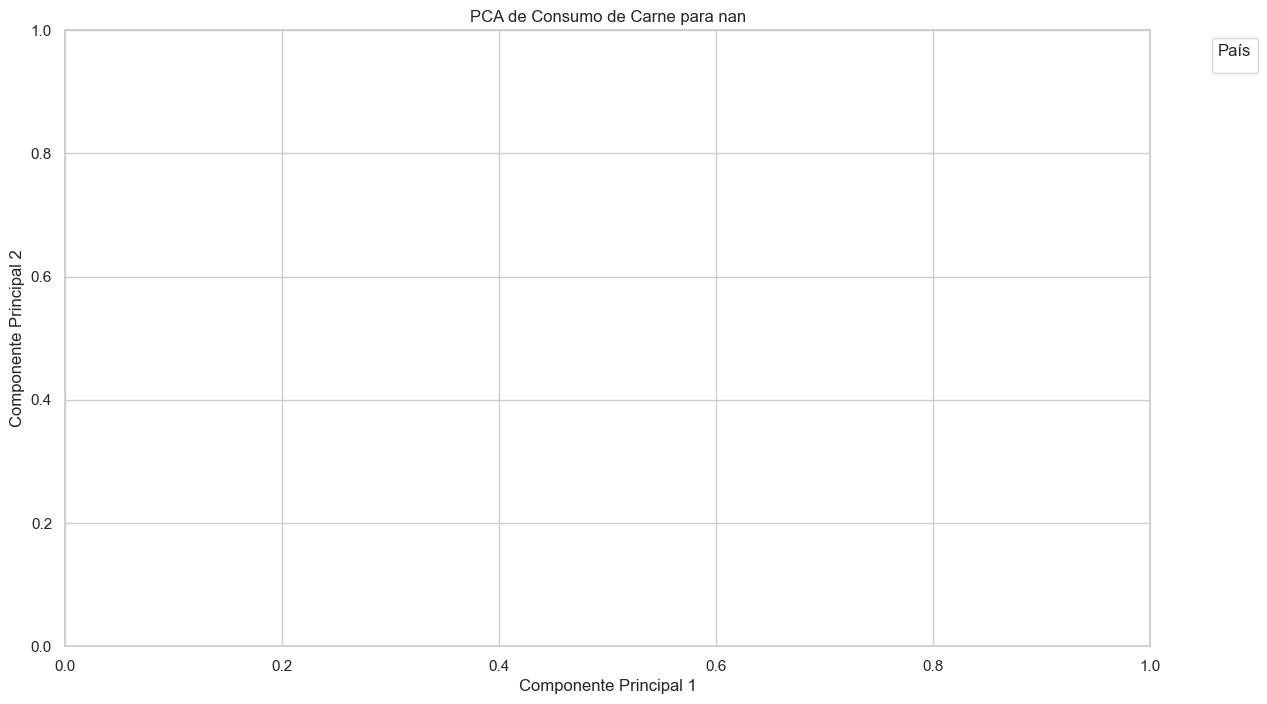

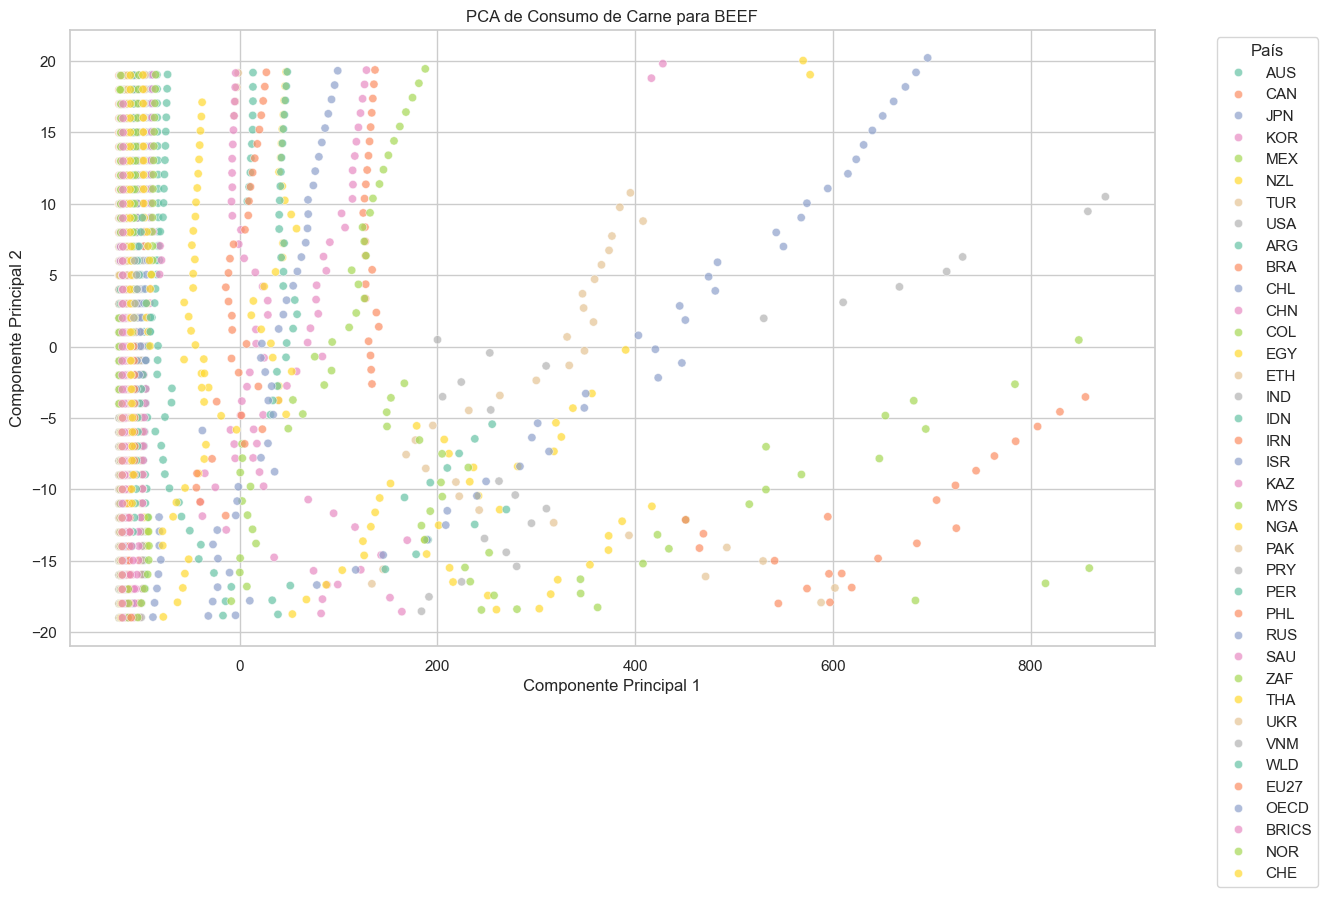

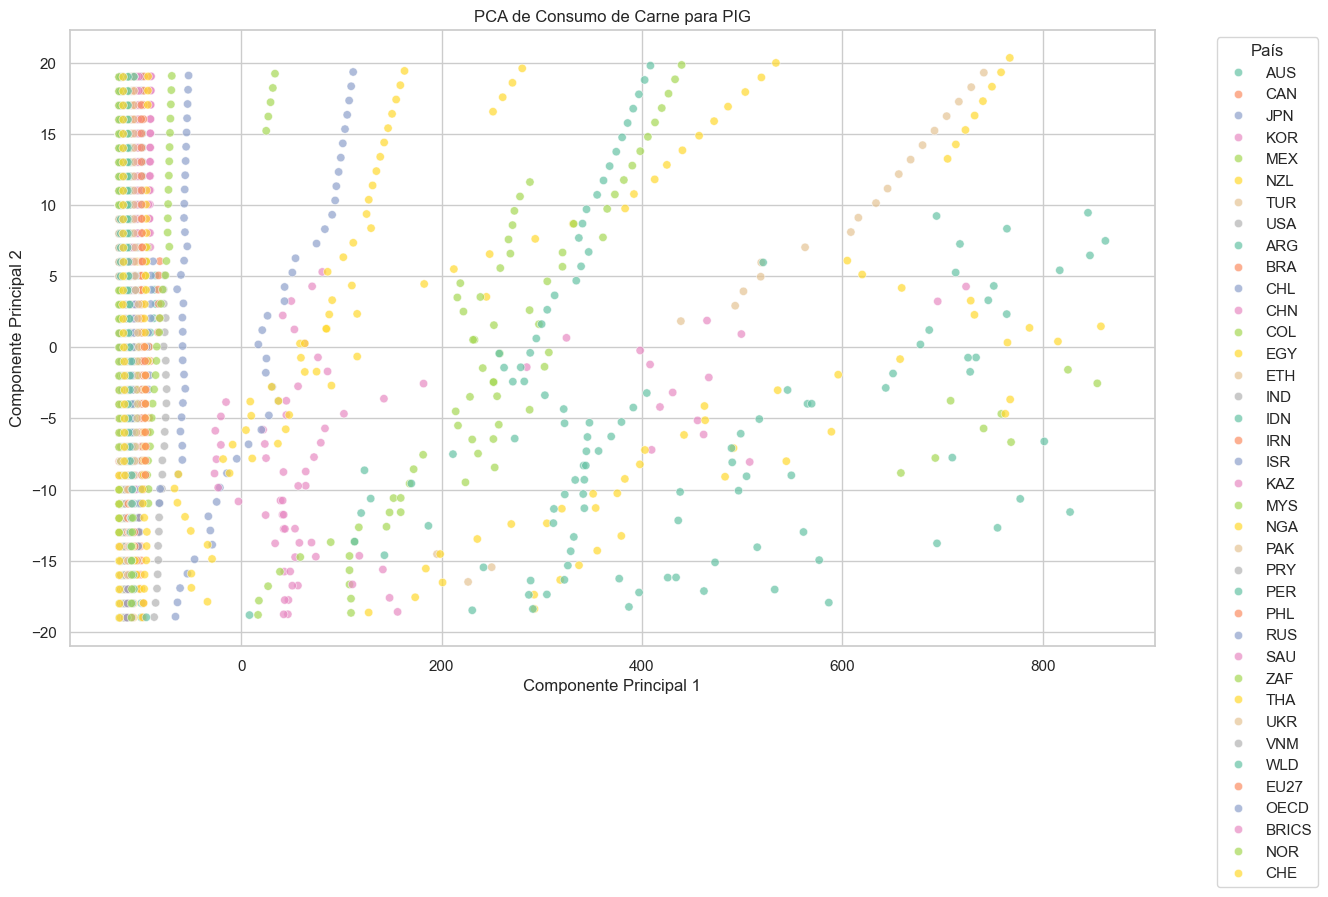

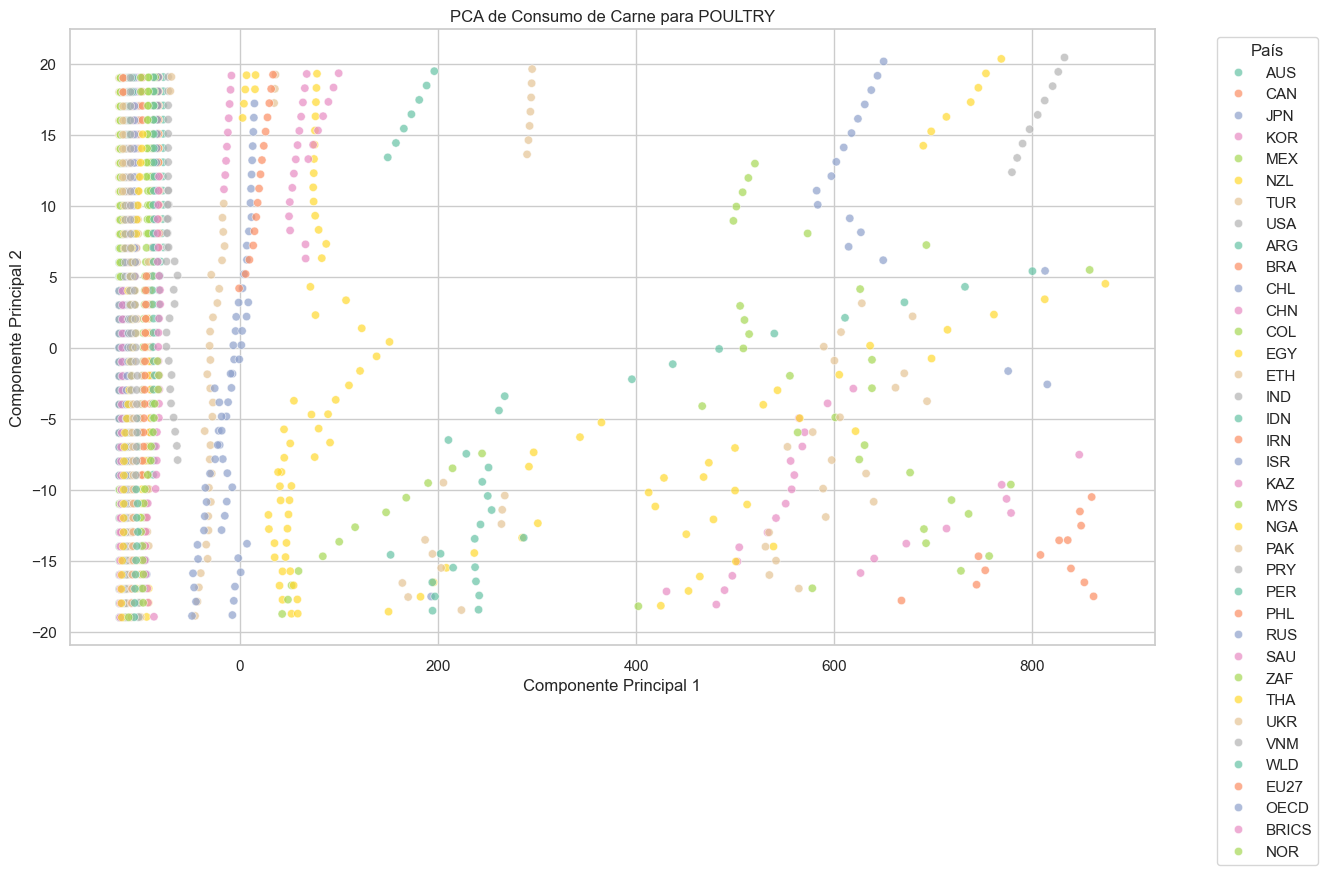

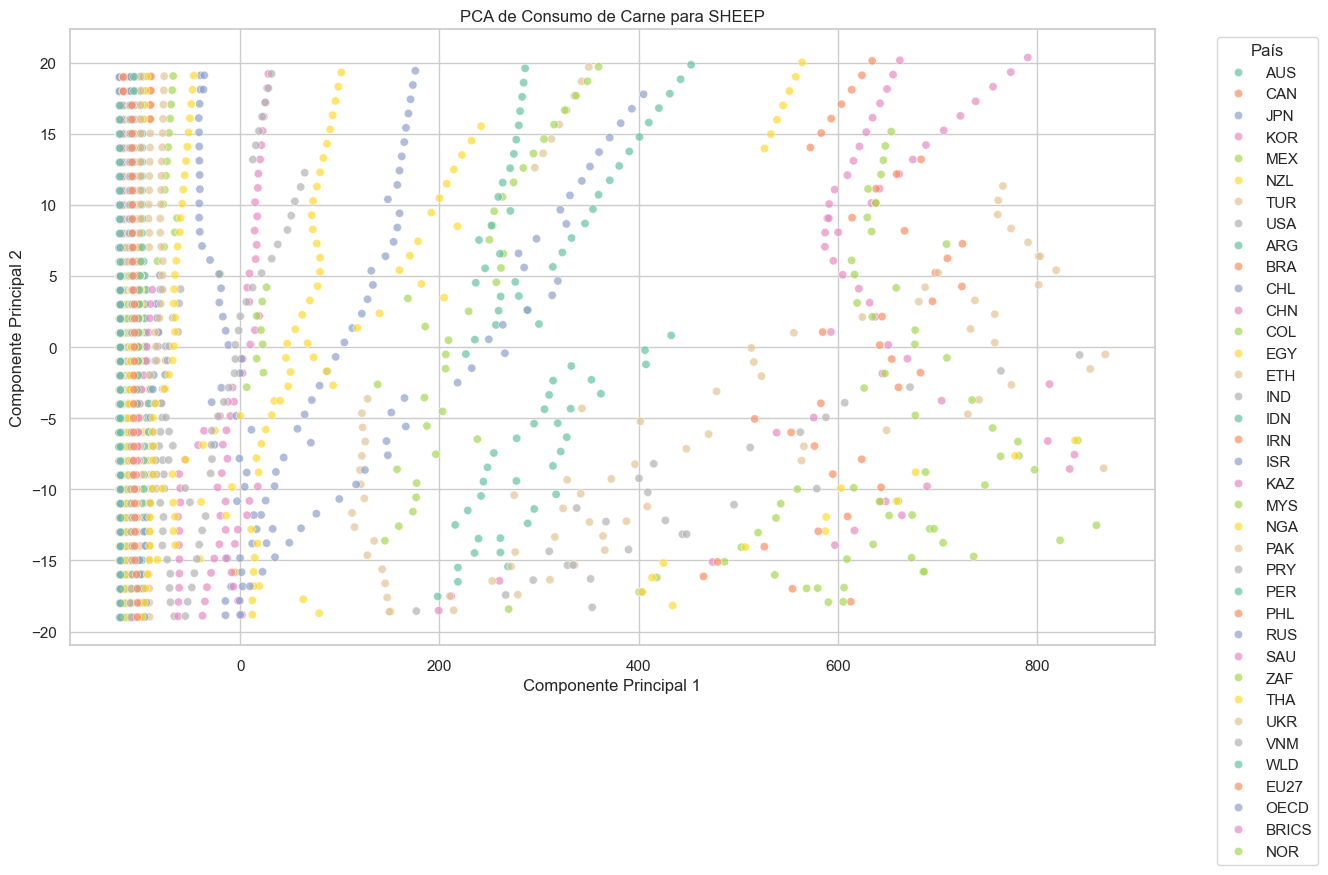

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline

# Cargar y limpiar el dataset
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")
df.columns = df.columns.str.strip()
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df_cleaned = df.dropna(subset=['value'])

# Seleccionar solo las columnas numéricas para PCA
numeric_cols = ['time', 'value']
df_numeric = df_cleaned[numeric_cols]

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numeric)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['subject'] = df_cleaned['subject']
df_pca['location'] = df_cleaned['location']




# Lista de tipos de carne
types_of_meat = df_pca['subject'].unique()

# Crear un gráfico individual para cada tipo de carne
for meat_type in types_of_meat:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='PC1', y='PC2', data=df_pca[df_pca['subject'] == meat_type], hue='location', palette='Set2', alpha=0.7)
    plt.title(f'PCA de Consumo de Carne para {meat_type}')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()





EXPLICACIÓN:

Análisis de los Gráficos de PCA para Cada Tipo de Carne
Los gráficos muestran la distribución de los datos proyectados en los dos primeros componentes principales obtenidos a través de PCA. Vamos a analizar cada uno de ellos:

1. SHEEP
Distribución: La mayoría de los puntos están concentrados en la parte inferior izquierda, pero también hay una dispersión considerable hacia la derecha y hacia arriba.
Variabilidad: La dispersión sugiere que hay una variabilidad significativa en el consumo de carne de oveja entre los diferentes países.
Agrupamiento: No hay un agrupamiento claro de los países, lo que sugiere que el consumo de carne de oveja no sigue un patrón específico por país en los componentes principales.
2. POULTRY
Distribución: Similar al gráfico de oveja, con una alta concentración en la parte inferior izquierda y una dispersión hacia la derecha.
Variabilidad: Hay una variabilidad considerable en el consumo de carne de ave entre los diferentes países.
Agrupamiento: Tampoco hay un agrupamiento claro por países, lo que sugiere que el consumo de carne de ave varía ampliamente sin patrones evidentes en los componentes principales.
3. PIG
Distribución: La distribución de los puntos sigue siendo amplia, pero parece haber una mayor dispersión hacia la derecha.
Variabilidad: La variabilidad en el consumo de carne de cerdo es alta, con muchos puntos dispersos en toda la gráfica.
Agrupamiento: No se observa un agrupamiento claro, indicando que no hay patrones específicos de consumo de carne de cerdo entre los países en los componentes principales.
4. BEEF
Distribución: Similar a los otros gráficos, con una alta concentración en la parte inferior izquierda y una dispersión hacia la derecha.
Variabilidad: La variabilidad en el consumo de carne de res es considerable, con puntos dispersos a lo largo de ambos componentes principales.
Agrupamiento: Al igual que con los otros tipos de carne, no hay un agrupamiento claro, sugiriendo que el consumo de carne de res no sigue un patrón específico entre los países.



Conclusiones Generales
Variabilidad Alta: En todos los gráficos, podemos observar una alta variabilidad en el consumo de carne entre los países.
Falta de Agrupamiento Claro: No hay patrones de agrupamiento evidentes en los componentes principales, lo que sugiere que los factores que afectan el consumo de diferentes tipos de carne son variados y no están claramente diferenciados por país.
Importancia de PCA: Los gráficos de PCA son útiles para reducir la dimensionalidad y visualizar la variabilidad en los datos, pero en este caso, no revelan agrupamientos claros.

LO PODEMOS ACORTAR Y HACER UN ANÁLISIS CON UNA MUESTRA DE LAS 5 POTENCIAS MUNDIALES O IR HACIENDOLO CADA CONTINENTE O CADA 5 PAÍSES

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\1784768940.py:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=df_pca[df_pca['subject'] == meat_type], hue='location', palette='Set2', alpha=0.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Países presentes después del filtrado: ['AUS' 'CAN' 'MEX' 'NZL' 'CHL']


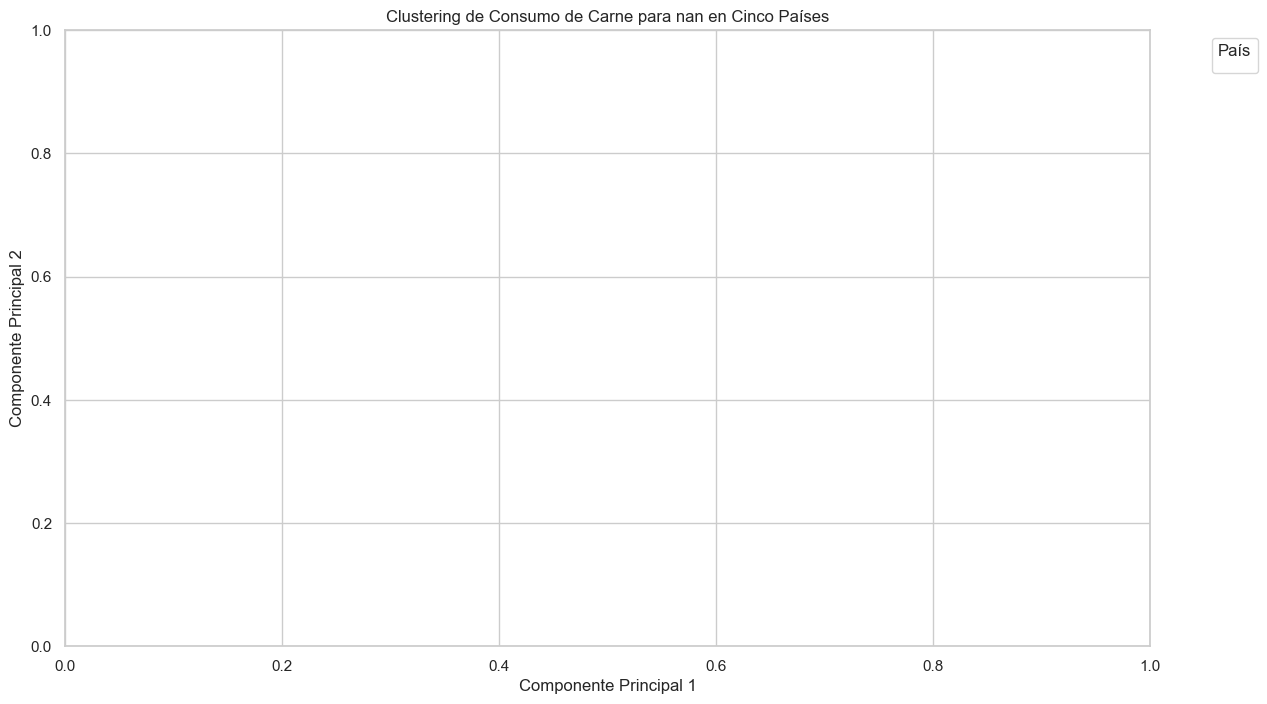

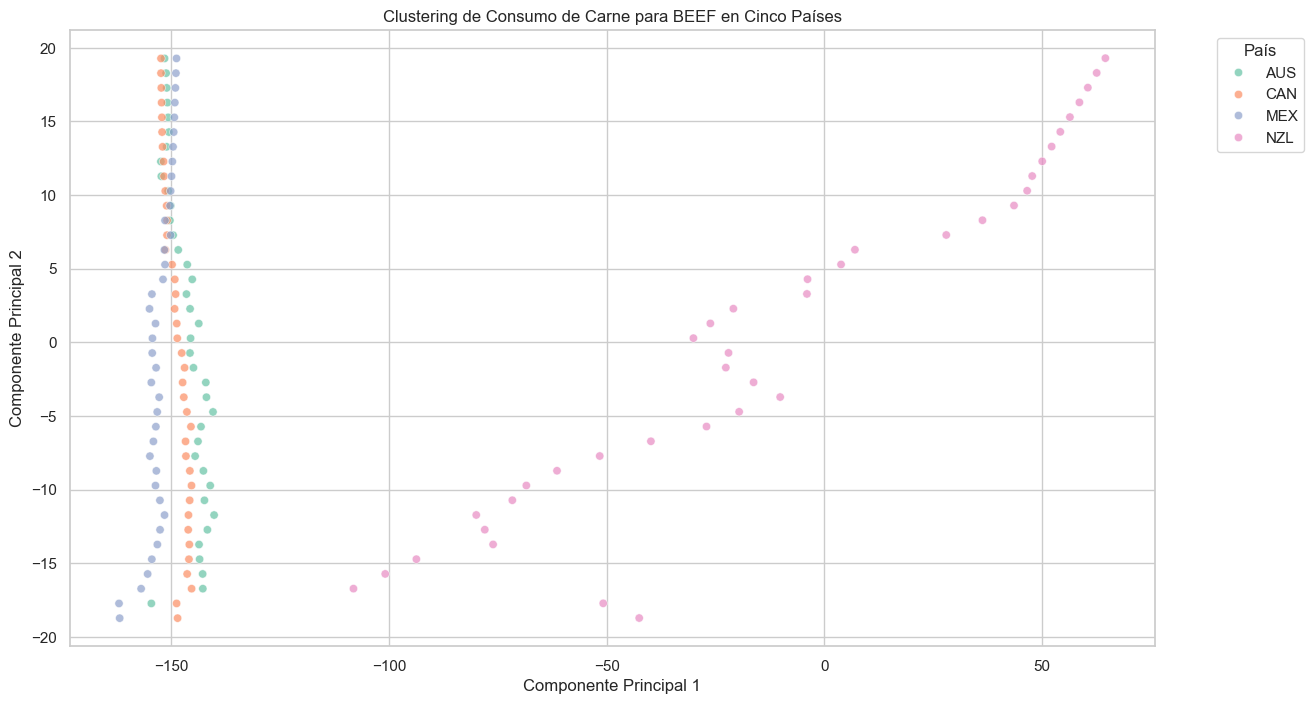

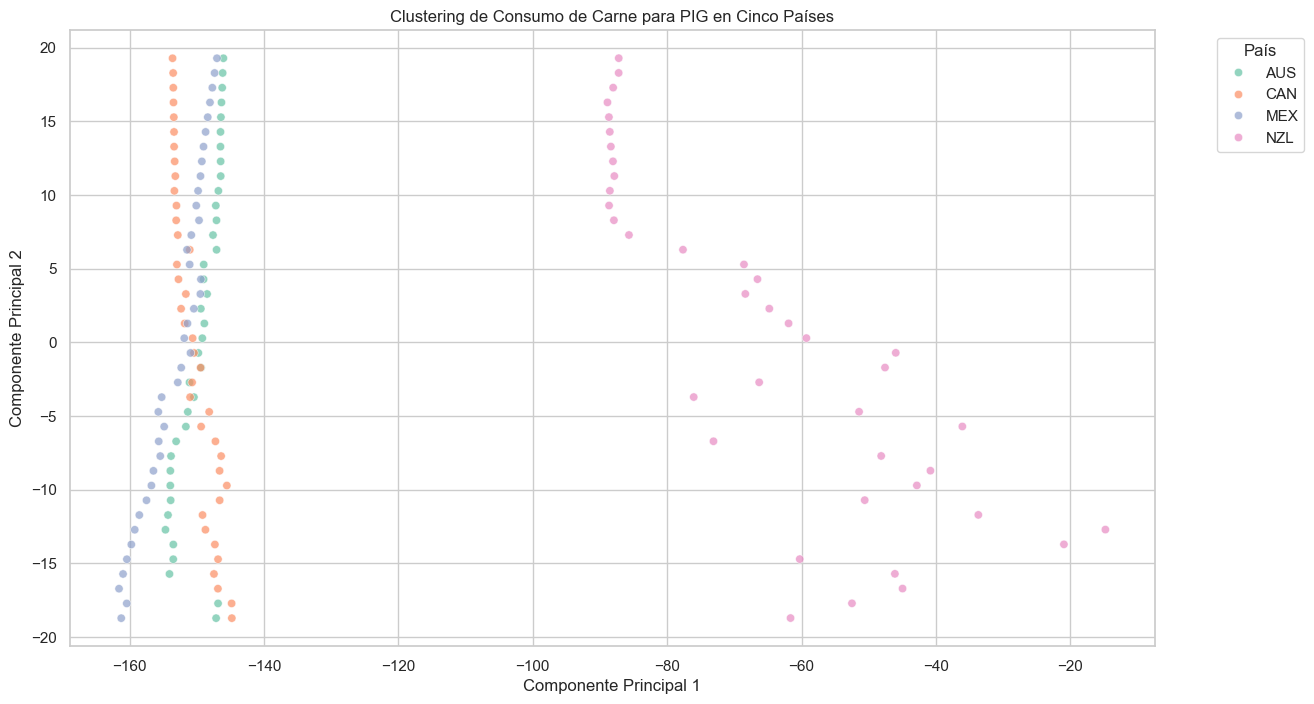

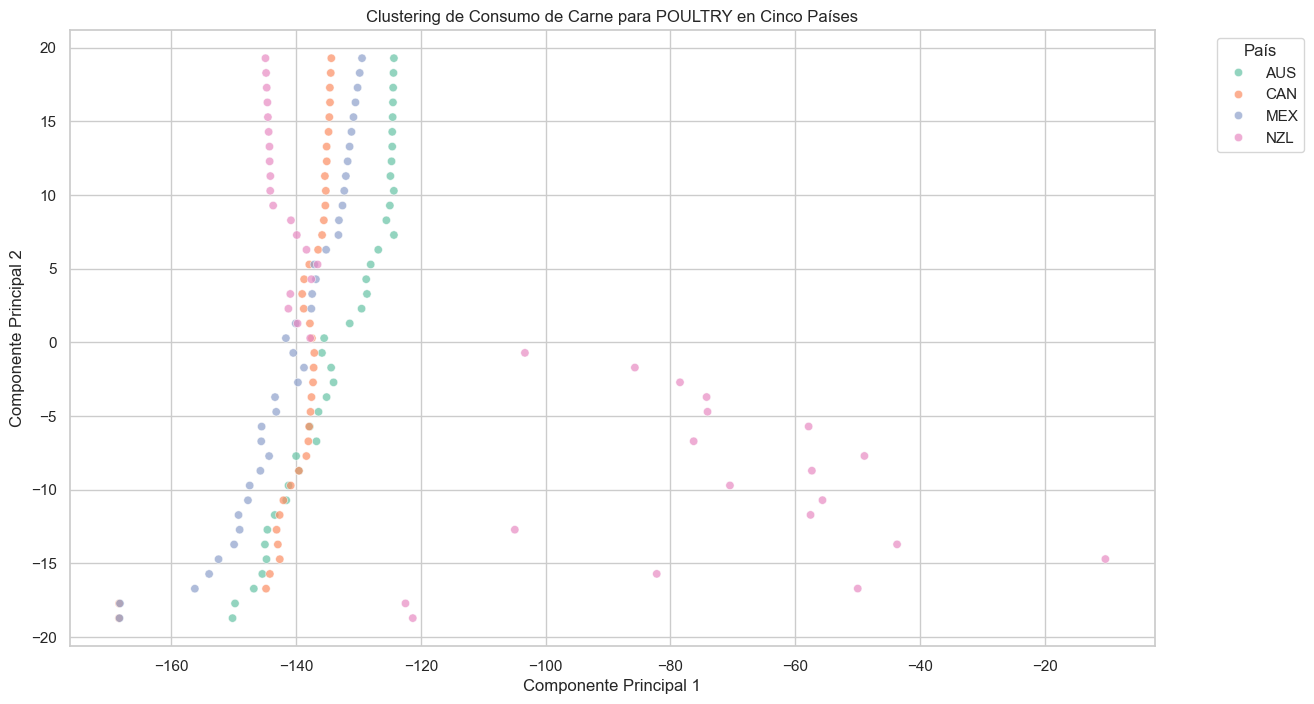

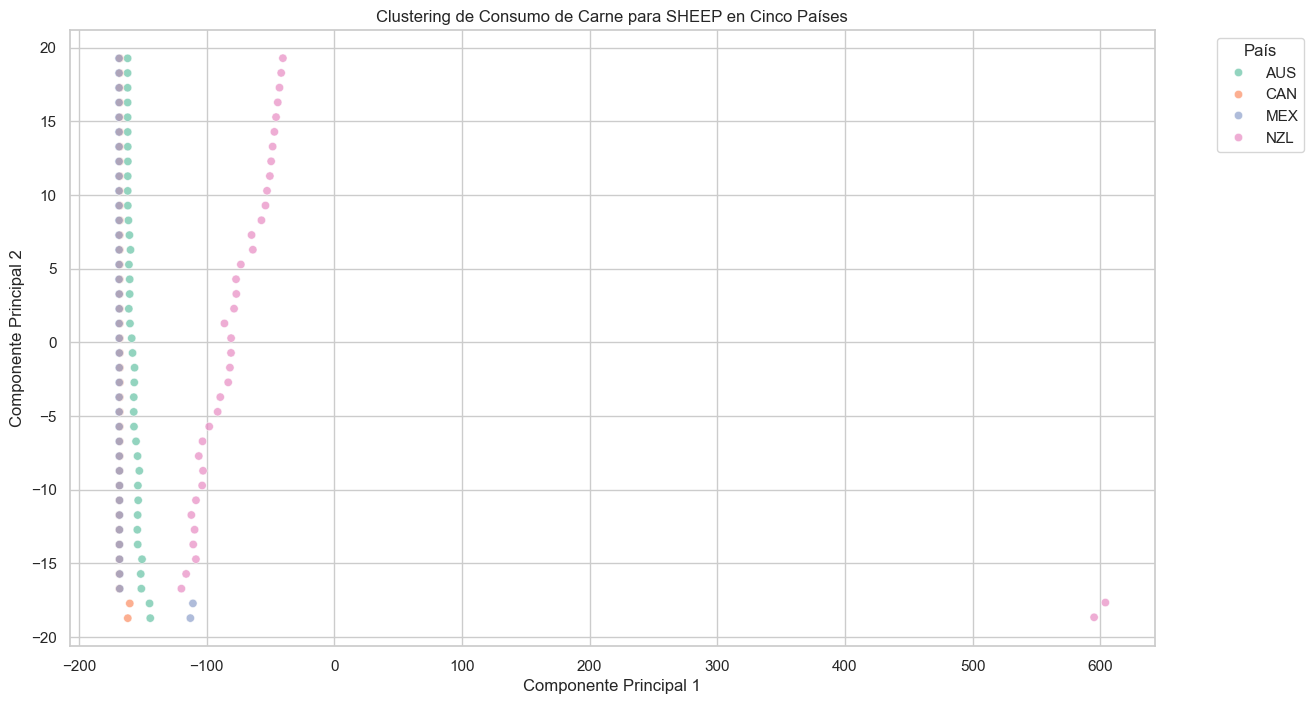

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline



# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'value' a numérico, forzando errores a NaN para su fácil identificación
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Manejar los valores NaN eliminándolos
df_cleaned = df.dropna(subset=['value'])

# Filtrar los datos para los cinco países mencionados
five_countries = ['AUS', 'CAN', 'MEX', 'NZL', 'CHL']
df_five = df_cleaned[df_cleaned['location'].isin(five_countries)]

# Verificar el filtrado de los países
print("Países presentes después del filtrado:", df_five['location'].unique())

# Seleccionar solo las columnas numéricas para PCA
numeric_cols = ['time', 'value']
df_numeric = df_five[numeric_cols]

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numeric)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['subject'] = df_five['subject']
df_pca['location'] = df_five['location']

# Lista de tipos de carne
types_of_meat = df_pca['subject'].unique()

# Crear un gráfico individual para cada tipo de carne
for meat_type in types_of_meat:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='PC1', y='PC2', data=df_pca[df_pca['subject'] == meat_type], hue='location', palette='Set2', alpha=0.7)
    plt.title(f'Clustering de Consumo de Carne para {meat_type} en Cinco Países')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


REGRESIÓN LOGÍSTICA

EXPLICACIÓN Y PROCESO:

Proceso y Resultados de la Regresión Logística
Introducción
El objetivo del análisis es utilizar una regresión logística para predecir si el consumo de carne de res (BEEF) en un país es mayor que la media mundial, basándonos en el consumo de otros tipos de carne (cerdo, ave, oveja) y el tiempo.

Descripción del Dataset y Procesamiento
Origen del Dataset: El dataset proviene de datos globales de consumo de carne.
Variables Principales:
Consumo de Carne de Res (BEEF): Variable objetivo binaria.
Consumo de Carne de Cerdo (PIG), Ave (POULTRY), Oveja (SHEEP): Variables predictoras.
Año (time): Variable predictora.
El dataset fue filtrado para incluir solo datos de los países seleccionados: Estados Unidos, China, Japón, Canadá y México. Se eliminaron las filas con valores faltantes y se creó una variable binaria que indica si el consumo de carne de res es mayor que la media mundial.

Metodología
Preprocesamiento de Datos:

Conversión de la columna 'value' a formato numérico.
Creación de una variable binaria para el consumo alto de carne de res.
Pivoteo del dataset para obtener las variables predictoras en formato adecuado.
Ajuste del Modelo:

División de los datos en conjuntos de entrenamiento y prueba.
Entrenamiento de un modelo de regresión logística.
Evaluación del Modelo:

Se utilizó la matriz de confusión, el informe de clasificación y la curva ROC para evaluar el rendimiento del modelo.
Resultados
Classification Report:

Precisión, recall y F1-score para cada clase (alto y bajo consumo de carne de res).
Confusion Matrix:

Resumen de los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
ROC Curve:

Curva ROC y área bajo la curva (AUC), que mide la capacidad del modelo para distinguir entre clases.
Interpretación de Resultados
Matriz de Confusión:

Permite entender cuántas predicciones fueron correctas y cuántas incorrectas.
Informe de Clasificación:

Proporciona métricas detalladas sobre la precisión, recall y F1-score del modelo para cada clase.
Curva ROC:

La curva ROC y el valor AUC muestran la capacidad del modelo para diferenciar entre consumos altos y bajos de carne de res. Un AUC cercano a 1 indica un buen rendimiento del modelo.
Conclusiones
La regresión logística aplicada al dataset de consumo de carne proporciona una herramienta para predecir si el consumo de carne de res en un país es alto basado en el consumo de otros tipos de carne y el año. La evaluación del modelo sugiere que, aunque hay una capacidad de predicción razonable, el modelo puede mejorarse con más variables predictoras o técnicas de modelado avanzadas. Este análisis es útil para identificar patrones en el consumo de carne y tomar decisiones informadas en políticas alimentarias y marketing.








In [138]:
# Importando las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline

# Cargando el dataset desde el archivo CSV
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

# Mostrar las primeras filas del dataset para verificar su estructura
df.head()

# Limpiar nombres de columnas para eliminar espacios en blanco
df.columns = df.columns.str.strip()

# Filtrar los países seleccionados
selected_countries = ['USA', 'CHN', 'JPN', 'CAN', 'MEX']
df_filtered = df[df['location'].isin(selected_countries)]

# Convertir la columna 'value' a numérico
df_filtered['value'] = pd.to_numeric(df_filtered['value'].str.strip(), errors='coerce')

# Eliminar filas con valores NaN
df_filtered.dropna(subset=['value'], inplace=True)

# Crear una variable binaria para el consumo de carne de res (BEEF)
df_filtered['high_beef_consumption'] = np.where((df_filtered['subject'] == 'BEEF') & (df_filtered['value'] > df_filtered['value'].mean()), 1, 0)

# Crear el conjunto de datos final para la regresión logística
df_final = df_filtered.pivot_table(index=['location', 'time'], columns='subject', values='value').reset_index()
df_final['high_beef_consumption'] = np.where(df_final['BEEF'] > df_final['BEEF'].mean(), 1, 0)

# Eliminar filas con valores NaN en df_final
df_final.dropna(inplace=True)


C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\2928946755.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['value'] = pd.to_numeric(df_filtered['value'].str.strip(), errors='coerce')
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\2928946755.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['value'], inplace=True)
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\2928946755.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [139]:
# Separar las características (X) y la variable objetivo (y)
X = df_final[['PIG', 'POULTRY', 'SHEEP', 'time']]
y = df_final['high_beef_consumption']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)


In [140]:
# Evaluación del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        53
           1       0.60      1.00      0.75         6

    accuracy                           0.93        59
   macro avg       0.80      0.96      0.86        59
weighted avg       0.96      0.93      0.94        59



EXPLICACIÓN:

Interpretación del Informe de Clasificación
El informe de clasificación incluye varias métricas importantes para evaluar el rendimiento del modelo de regresión logística. Aquí está el desglose de cada métrica y su interpretación:

1. Precisión (Precision)
La precisión es el número de verdaderos positivos dividido por el número total de elementos que se clasificaron como positivos (verdaderos positivos + falsos positivos). Es una medida de la exactitud de las predicciones positivas del modelo.

Clase 0 (No alto consumo de carne de res): La precisión es 1.00, lo que significa que todas las predicciones de la clase 0 fueron correctas.
Clase 1 (Alto consumo de carne de res): La precisión es 0.60, lo que indica que el 60% de las predicciones de la clase 1 fueron correctas.


2. Recall
El recall es el número de verdaderos positivos dividido por el número total de elementos que realmente son positivos (verdaderos positivos + falsos negativos). Mide la capacidad del modelo para detectar todos los casos positivos.

Clase 0: El recall es 0.92, lo que significa que el modelo identificó correctamente el 92% de los casos de la clase 0.
Clase 1: El recall es 1.00, lo que indica que el modelo identificó correctamente el 100% de los casos de la clase 1.


3. F1-Score
El F1-score es la media armónica de la precisión y el recall. Es una métrica combinada que da una idea del equilibrio entre precisión y recall.

Clase 0: El F1-score es 0.96, lo que indica un excelente equilibrio entre precisión y recall para la clase 0.
Clase 1: El F1-score es 0.75, lo que muestra un buen equilibrio, aunque inferior al de la clase 0, para la clase 1.


4. Support
El soporte es el número de ocurrencias reales de la clase en el conjunto de datos de prueba.

Clase 0: Hay 53 ocurrencias de la clase 0.
Clase 1: Hay 6 ocurrencias de la clase 1.


5. Accuracy
La precisión global del modelo es 0.93, lo que significa que el 93% de las predicciones totales fueron correctas.



6. Macro Average
El promedio macro (macro avg) es la media aritmética de la precisión, el recall y el F1-score de todas las clases, sin considerar el desequilibrio entre clases.

Precisión macro: 0.80
Recall macro: 0.96
F1-score macro: 0.86


7. Weighted Average
El promedio ponderado (weighted avg) tiene en cuenta el soporte (número de ocurrencias) de cada clase al calcular la media de las métricas.

Precisión ponderada: 0.96
Recall ponderado: 0.93
F1-score ponderado: 0.94


Interpretación General

Alta Precisión para Clase 0: El modelo es muy preciso para predecir la clase 0, con una precisión de 1.00, lo que significa que no hay falsos positivos en esta clase.

Recall Perfecto para Clase 1: El modelo tiene un recall perfecto para la clase 1, lo que significa que identificó correctamente todos los casos de alto consumo de carne de res.

Desempeño Inferior en la Clase 1: Aunque el modelo tiene un recall perfecto para la clase 1, la precisión es más baja (0.60), lo que sugiere que hay algunos falsos positivos en esta clase.

Desbalance de Clases: La clase 1 tiene un soporte mucho menor (6 ocurrencias) en comparación con la clase 0 (53 ocurrencias), lo que puede haber afectado las métricas de desempeño del modelo.


Conclusión
El modelo de regresión logística muestra un buen rendimiento general con una precisión del 93%. Sin embargo, debido al desbalance de clases, el rendimiento para la clase 1 (alto consumo de carne de res) es inferior en términos de precisión (0.60), aunque tiene un recall perfecto (1.00). Este desequilibrio puede ser un área de mejora para futuros modelos.

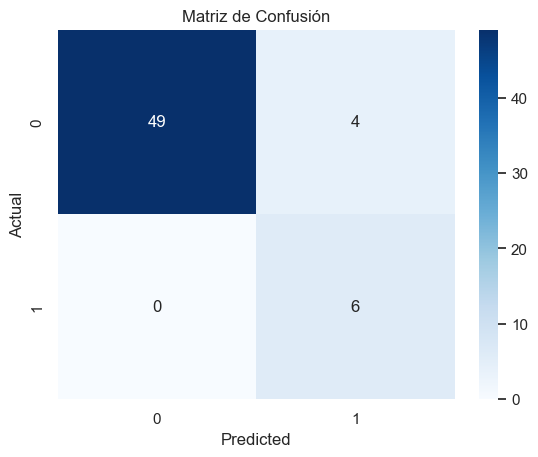

In [141]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


EXPLICACIÓN:

Interpretación de la Matriz de Confusión
La matriz de confusión es una herramienta que nos permite evaluar el rendimiento de un modelo de clasificación mostrando las predicciones correctas e incorrectas de cada clase. Cada celda de la matriz muestra el número de predicciones realizadas por el modelo.

Estructura de la Matriz de Confusión
La matriz de confusión tiene cuatro celdas principales:

Verdaderos Positivos (TP): Predicciones correctas de la clase positiva.
Falsos Negativos (FN): Predicciones incorrectas de la clase negativa.
Falsos Positivos (FP): Predicciones incorrectas de la clase positiva.
Verdaderos Negativos (TN): Predicciones correctas de la clase negativa.


Análisis de la Matriz de Confusión

En la matriz de confusión proporcionada, tenemos:


Verdaderos Negativos (TN): 49

Falsos Positivos (FP): 4

Falsos Negativos (FN): 0

Verdaderos Positivos (TP): 6


Interpretación

Verdaderos Negativos (TN) - 49:

El modelo predijo correctamente que 49 instancias no pertenecen a la clase positiva (alto consumo de carne de res).
Estos son los casos en los que el modelo predijo 0 y la clase real también era 0.

Falsos Positivos (FP) - 4:

El modelo predijo incorrectamente que 4 instancias pertenecen a la clase positiva cuando en realidad no lo son.
Estos son los casos en los que el modelo predijo 1 pero la clase real era 0.

Falsos Negativos (FN) - 0:

El modelo no cometió ningún error al predecir que una instancia no pertenecía a la clase positiva cuando en realidad sí lo era.
No hay casos en los que el modelo predijo 0 pero la clase real era 1.

Verdaderos Positivos (TP) - 6:

El modelo predijo correctamente que 6 instancias pertenecen a la clase positiva.
Estos son los casos en los que el modelo predijo 1 y la clase real también era 1.



Conclusiones

Buen Desempeño para la Clase 0:

El modelo tiene un alto número de verdaderos negativos (49) y un bajo número de falsos positivos (4), lo que indica un buen rendimiento para la clase 0.

Perfecto Desempeño para la Clase 1:

El modelo no tiene falsos negativos (0), lo que significa que no omitió ninguna instancia de la clase positiva.
Predijo correctamente todas las instancias de la clase 1 (6).


Precisión y Recall:

La precisión para la clase 1 es razonablemente buena (0.60), aunque hay algunos falsos positivos.
El recall para la clase 1 es perfecto (1.00), ya que no hay falsos negativos.


Implicaciones:

El modelo tiene un buen desempeño general, pero tiene un pequeño margen de mejora en la precisión de la clase positiva, ya que predijo algunos falsos positivos.
El alto recall para la clase positiva es útil en aplicaciones donde es más importante capturar todas las instancias positivas, incluso si se incluyen algunos falsos positivos.
Esta matriz de confusión indica que el modelo es efectivo para identificar correctamente las instancias de alto consumo de carne de res (clase 1) sin omitir ninguna, aunque hay algunos casos en los que predice incorrectamente el alto consumo cuando no lo es.

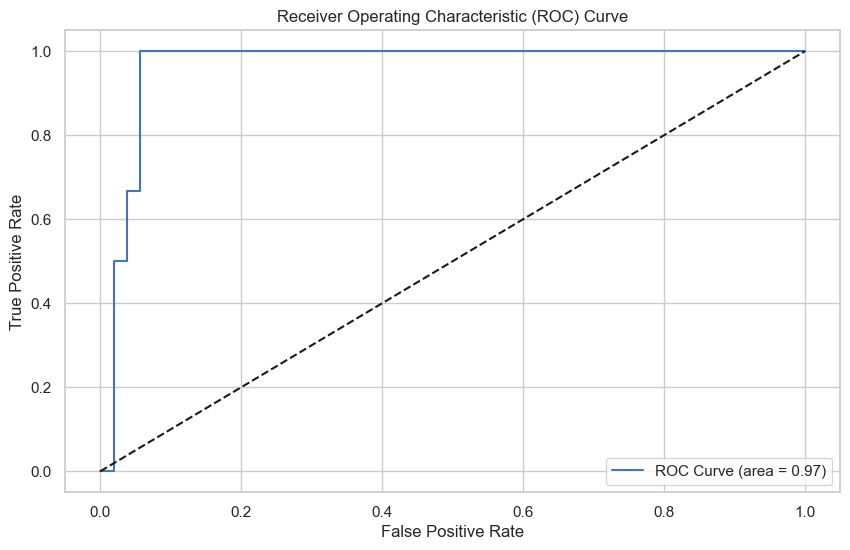

In [142]:
# Curva ROC
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


EXPLICACION:

Interpretación de la Curva ROC y AUC

Curva ROC
La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica que se utiliza para evaluar la capacidad de un modelo de clasificación binaria para distinguir entre clases. La curva ROC traza la Tasa de Verdaderos Positivos (TPR) frente a la Tasa de Falsos Positivos (FPR) a diferentes umbrales de clasificación.

Eje X (False Positive Rate - FPR): La FPR es la proporción de negativos que fueron incorrectamente clasificados como positivos. 

Eje Y (True Positive Rate - TPR): La TPR, también conocida como sensibilidad o recall, es la proporción de positivos correctamente clasificados. 

Área Bajo la Curva (AUC)
El AUC (Area Under the Curve) es una métrica que resume el rendimiento de la curva ROC en un solo valor. El AUC varía entre 0 y 1, donde un valor de 1 indica un modelo perfecto y un valor de 0.5 indica un modelo que no tiene capacidad discriminativa, similar a un clasificador aleatorio.

Interpretación del Gráfico

Forma de la Curva ROC:

La curva ROC comienza en el punto (0,0) y termina en el punto (1,1). Cuanto más cerca esté la curva del punto (0,1), mejor será el rendimiento del modelo.
En este gráfico, la curva ROC se eleva rápidamente hacia la TPR de 1, lo que indica que el modelo tiene un buen rendimiento en términos de TPR.

Área Bajo la Curva (AUC = 0.97):

El AUC es 0.97, lo que indica un excelente rendimiento del modelo. Un AUC de 0.97 significa que hay un 97% de probabilidad de que el modelo clasifique correctamente una instancia positiva aleatoria como más probable que una instancia negativa aleatoria.
Un AUC cercano a 1 es deseable y muestra que el modelo tiene una alta capacidad discriminativa entre las clases positiva y negativa.


Conclusiones
Alta Capacidad Discriminativa: La curva ROC y el alto valor de AUC indican que el modelo de regresión logística tiene una excelente capacidad para distinguir entre las clases de alto y bajo consumo de carne de res.
Precisión y Recall: La forma de la curva ROC sugiere que el modelo tiene una alta sensibilidad (recall) y una baja tasa de falsos positivos, lo que se alinea con los resultados anteriores del informe de clasificación y la matriz de confusión.
Rendimiento General: En conjunto, los resultados muestran que el modelo es confiable y eficaz para predecir el alto consumo de carne de res, y puede ser utilizado en aplicaciones donde la capacidad de discriminación entre clases es crucial.
Este análisis confirma la robustez del modelo en términos de su capacidad para predecir correctamente las clases positivas y negativas, proporcionando una base sólida para su implementación en la práctica.

PCA

In [147]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

# Filtrar los países seleccionados
selected_countries = ['USA', 'CHN', 'JPN', 'GBR', 'CAN']
df_filtered = df[df['location'].isin(selected_countries)]

# Convertir la columna 'value' a numérico y eliminar filas con valores NaN
df_filtered['value'] = pd.to_numeric(df_filtered[' value '].str.strip(), errors='coerce')
df_filtered.dropna(subset=['value'], inplace=True)

# Crear un DataFrame separado para cada tipo de carne
df_beef = df_filtered[df_filtered['subject'] == 'BEEF']
df_pig = df_filtered[df_filtered['subject'] == 'PIG']
df_poultry = df_filtered[df_filtered['subject'] == 'POULTRY']
df_sheep = df_filtered[df_filtered['subject'] == 'SHEEP']


# Función para aplicar PCA y devolver el DataFrame con los componentes principales
def apply_pca(df, n_components=2):
    features = ['value', 'time']
    x = df.loc[:, features].values
    y = df.loc[:, ['location']].values
    
    # Estandarizar las características
    x = StandardScaler().fit_transform(x)
    
    # Aplicar PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(x)
    
    # Crear un DataFrame con los componentes principales
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df = pd.concat([pca_df, df.reset_index(drop=True)], axis=1)
    
    return pca_df, pca

# Aplicar PCA a cada DataFrame de tipo de carne
pca_beef, pca_beef_model = apply_pca(df_beef)
pca_pig, pca_pig_model = apply_pca(df_pig)
pca_poultry, pca_poultry_model = apply_pca(df_poultry)
pca_sheep, pca_sheep_model = apply_pca(df_sheep)



C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\250629904.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['value'] = pd.to_numeric(df_filtered[' value '].str.strip(), errors='coerce')
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\250629904.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['value'], inplace=True)


SCREE PLOT

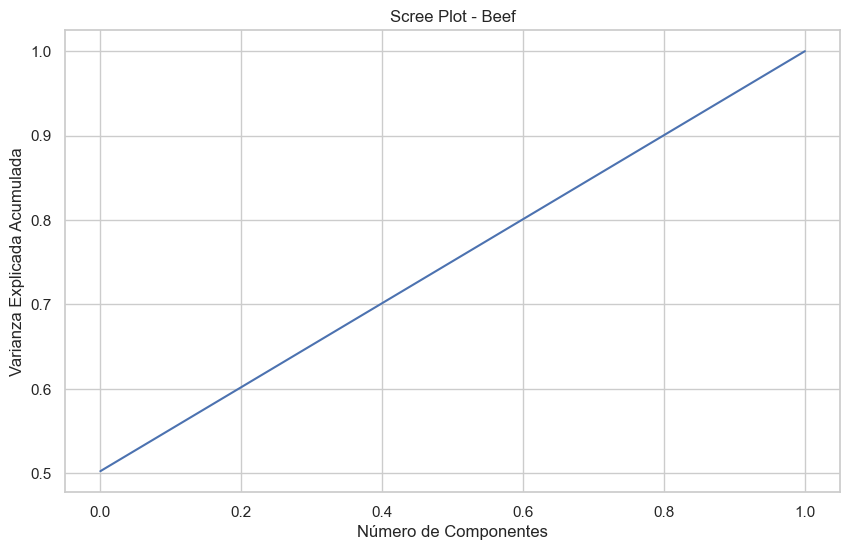

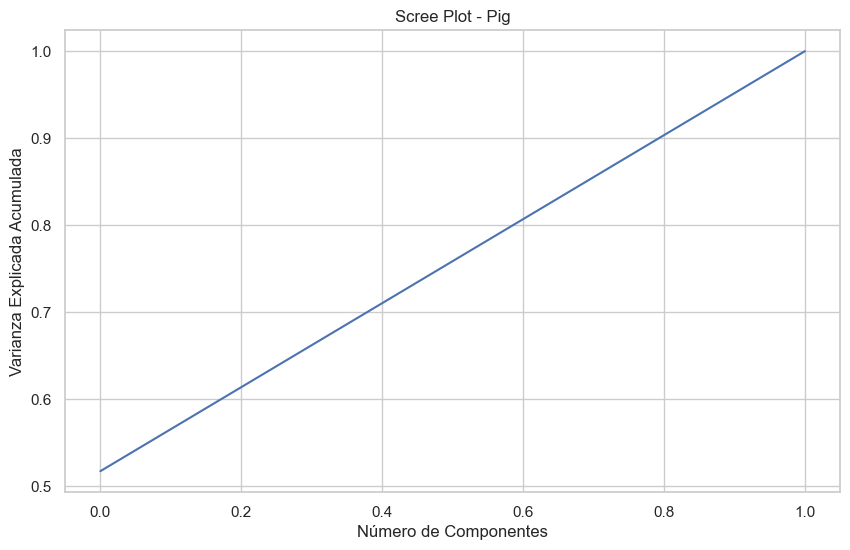

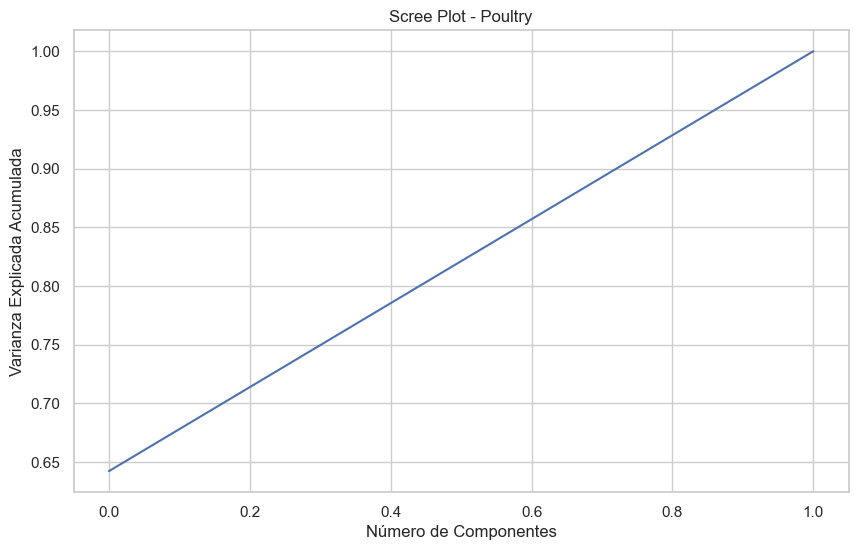

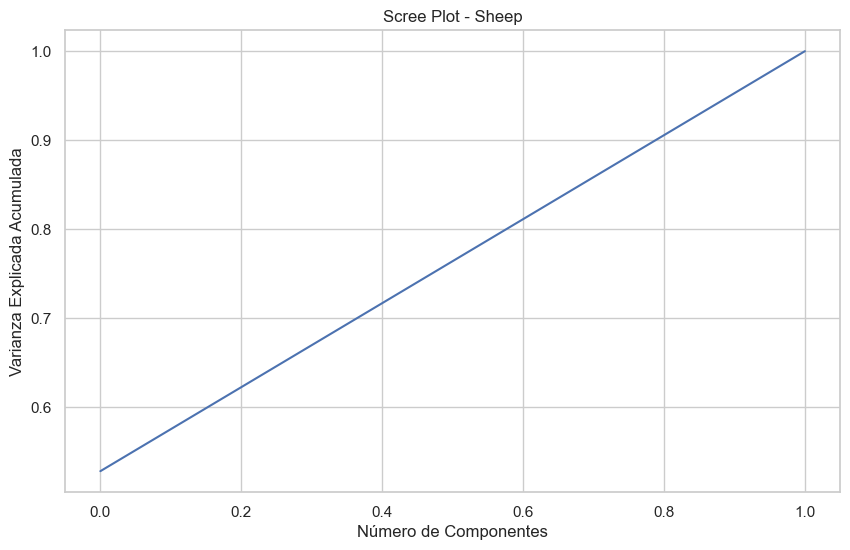

In [148]:
# Función para crear el Scree Plot
def plot_scree(pca_model, title):
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
    plt.xlabel('Número de Componentes')
    plt.ylabel('Varianza Explicada Acumulada')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Crear Scree Plot para cada tipo de carne
plot_scree(pca_beef_model, 'Scree Plot - Beef')
plot_scree(pca_pig_model, 'Scree Plot - Pig')
plot_scree(pca_poultry_model, 'Scree Plot - Poultry')
plot_scree(pca_sheep_model, 'Scree Plot - Sheep')


EXPLICACIÓN:

Scree Plot

Un Scree Plot muestra la varianza explicada por cada componente principal. La varianza explicada disminuye rápidamente con cada componente adicional, lo que justifica la elección de los dos primeros componentes para el análisis. Este gráfico nos ayuda a determinar cuántos componentes principales capturan una cantidad significativa de la varianza total de los datos.

DIAGRAMA DE DISPERSIÓN

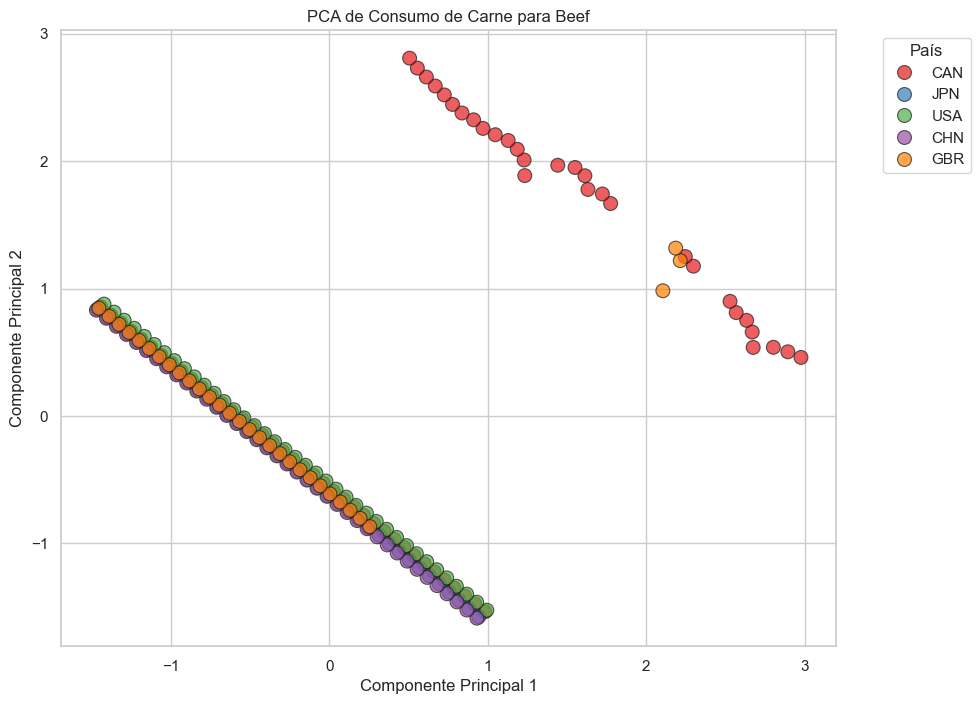

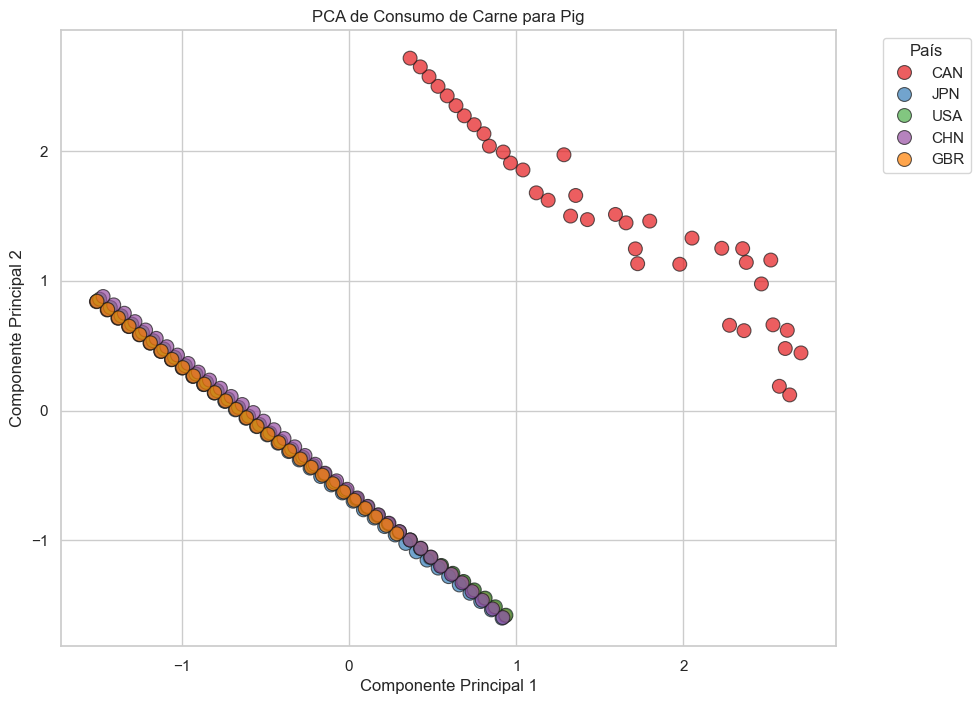

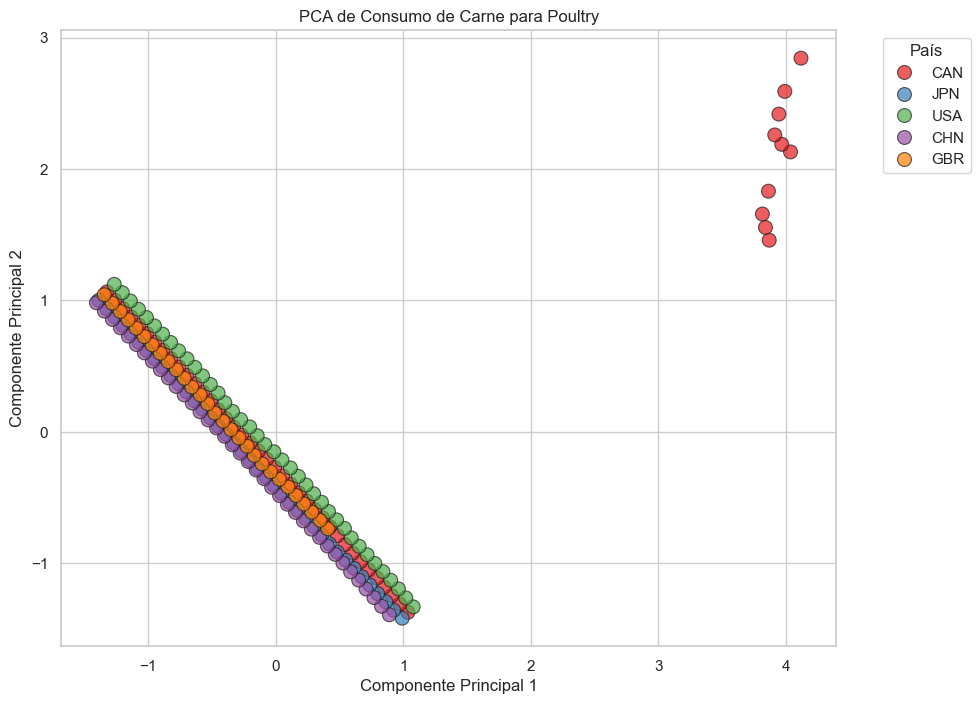

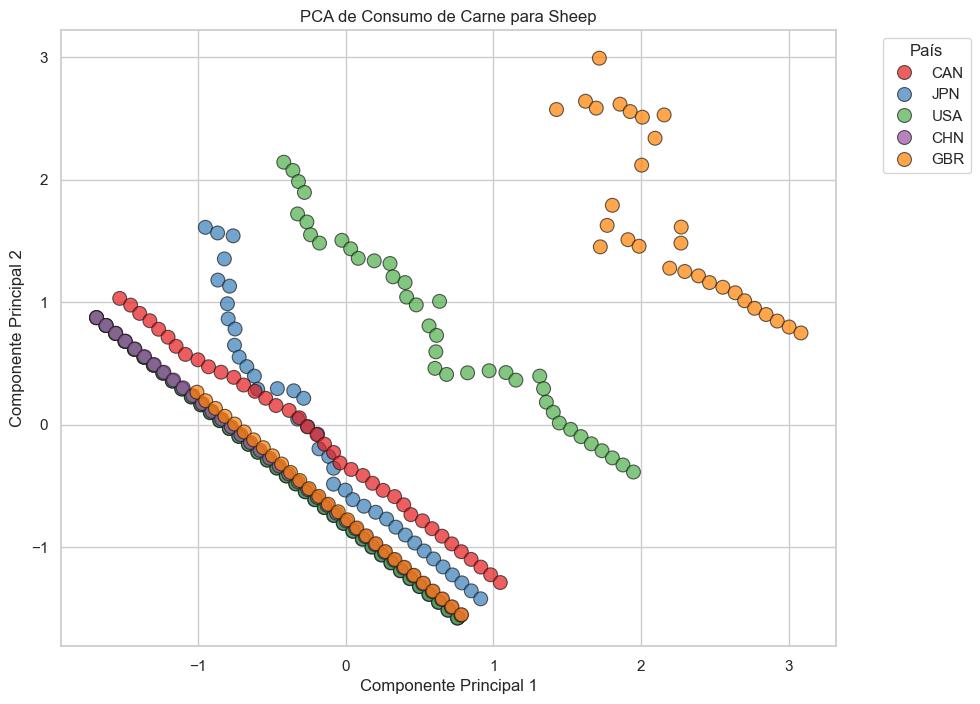

In [149]:
# Función para crear el diagrama de dispersión de los componentes principales
def plot_pca_scatter(pca_df, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='location', data=pca_df, palette='Set1', s=100, alpha=0.7, edgecolor='k')
    plt.title(title)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Crear diagramas de dispersión para cada tipo de carne
plot_pca_scatter(pca_beef, 'PCA de Consumo de Carne para Beef')
plot_pca_scatter(pca_pig, 'PCA de Consumo de Carne para Pig')
plot_pca_scatter(pca_poultry, 'PCA de Consumo de Carne para Poultry')
plot_pca_scatter(pca_sheep, 'PCA de Consumo de Carne para Sheep')


Diagramas de Dispersión

Los diagramas de dispersión de los componentes principales (PC1 y PC2) permiten visualizar cómo se agrupan los datos de consumo de carne por país en el espacio de los componentes principales. Cada punto en el diagrama representa un país en un año determinado, coloreado según el país. Esto facilita la identificación de patrones de consumo de carne entre los países seleccionados y cómo estos patrones varían a lo largo del tiempo.